DEGREE CENTRALITY , BETWEENESS CENTRALITY , CLOSENESS CENTRALITY

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
# Create a directed graph
G = nx.DiGraph()
data = pd.read_csv('/content/preprocessed_normalized_dataset.csv')
# Add edges to the graph (from 'From' to 'To' with 'Quantity' as weight)
for index, row in data.iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Quantity'])

#Nodes (trading accounts) with high degree centrality, especially when they are connected to the same node (trader), may indicate a wash trading pattern, as a single trader controls multiple accounts with many connections.
#If certain accounts are acting as bridges between multiple traders, and those accounts frequently trade with the same group of addresses, it could be a sign of wash trading activity.
#accounts have the ability to quickly connect with other accounts, it could indicate that they are part of a coordinated manipulation effort

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)
# Display results
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)

# Save results to a file
centrality_df = pd.DataFrame({
    'Node': list(degree_centrality.keys()),
    'Degree Centrality': list(degree_centrality.values()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values())
})
centrality_df.to_excel('centrality_results.xlsx', index=False)


Degree Centrality: {'0x6469b34a2a4723163c4902dbbdea728d20693c12': 0.3024182076813656, '0x776a0725094cbf984e31b43d17e8aaec3c88294a': 0.0002844950213371266, '0x983dfba1c0724786598af0e63a9a6f94aabd24a1': 0.03470839260312945, '0x22f9dcf4647084d6c31b2765f6910cd85c178c18': 0.23556187766714085, '0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0': 0.0008534850640113799, '0xd98d9d8c5a70df5d5d8e39847ce254347a59816b': 0.0008534850640113799, '0x323d3416ed0375f57cf97739ea85134a600fbf7a': 0.0002844950213371266, '0xb68c93b1c084d5d8c53c1fe38c288cec628c4b71': 0.0002844950213371266, '0x7cdf2157738398e0f29b3f1b689846b347f92c6b': 0.0008534850640113799, '0xf603893b0ff9bb1c9062d201dfdd2b854386ddac': 0.0002844950213371266, '0xb90534454ffd337fa6203a517d6ab6d69849cf8c': 0.0002844950213371266, '0x6e86d9b7181c5d60680c53c141e18bfede6f63f1': 0.0005689900426742532, '0x0000000000000000000000000000000000000000': 0.0705547652916074, '0x5de0be2b0530fbf72f7f01dc1f9a789226cd2d03': 0.0002844950213371266, '0x7cef0d5a1d800b94fadb2

In [ ]:
# Step 5: Save the normalized data to a CSV file
output_csv_path = '/content/preprocessed_normalized_dataset.csv'
print(f"Normalized centrality metrics saved to: {output_csv_path}")


Normalized centrality metrics saved to: /content/preprocessed_normalized_dataset.csv


**SPRINT 2**

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the ERC20 dataset (normalised datset from sprint1 saved in csv format)
data_path = "preprocessed_normalized_dataset.csv"
df_preprocessed = pd.read_csv(data_path)

# Define features and data
features = [
    'Quantity', 'Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality',
    'Sender_Transaction_Count', 'Receiver_Transaction_Count',
    'Sender_Total_Quantity', 'Receiver_Total_Quantity', 'Hour', 'DayOfWeek',
    'TimeSinceLastTransaction'
]
X = df_preprocessed[features]





**PCA , RFE , FEATURE IMPORTANCE AND RANKING**

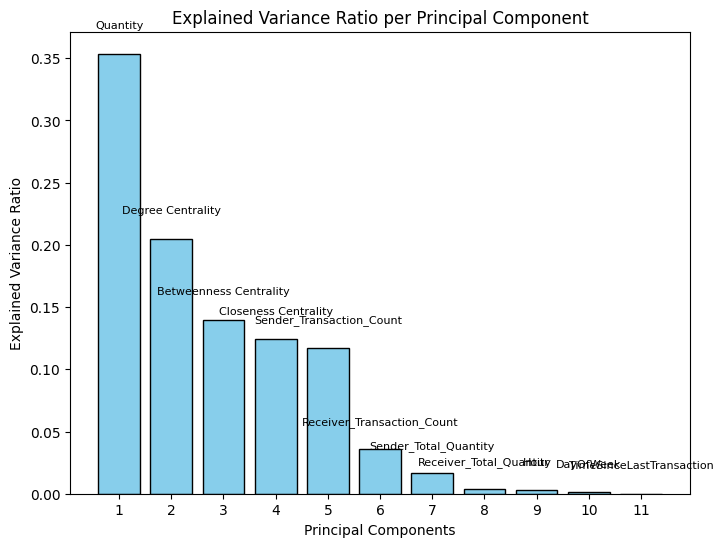


Total Explained Variance by PCA Components:
1.0


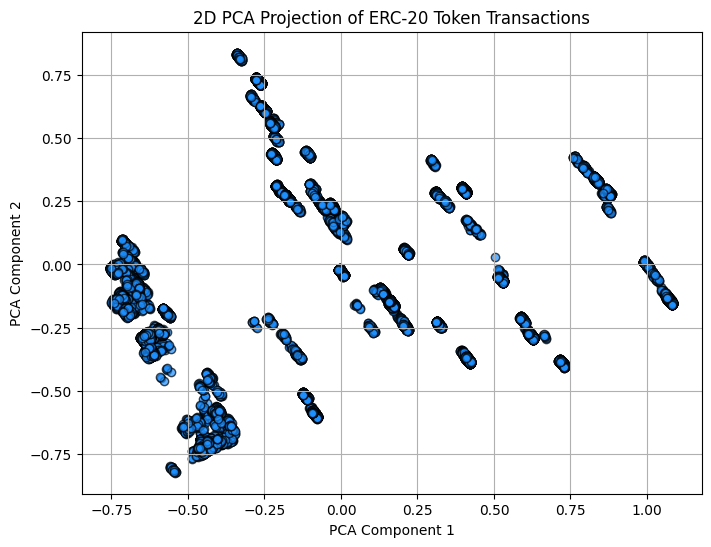

NameError: name 'y' is not defined

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
data_path = "preprocessed_normalized_dataset.csv"
df_preprocessed = pd.read_csv(data_path)
features = [
    'Quantity', 'Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality',
    'Sender_Transaction_Count', 'Receiver_Transaction_Count',
    'Sender_Total_Quantity', 'Receiver_Total_Quantity', 'Hour', 'DayOfWeek',
    'TimeSinceLastTransaction'
]
X = df_preprocessed[features]
#PCA (reduce to as many components as necessary)
pca = PCA(n_components=len(features))  #all components for full analysis
pca.fit(X)

#contributions to each principal component)
feature_loadings = pca.components_

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='skyblue', edgecolor='black')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))  # Label the x-axis for each principal component

# Annotate the plot with feature names based on their contribution to PC1 and PC2
for i, feature in enumerate(features):
    plt.text(i + 1, pca.explained_variance_ratio_[i] + 0.02, feature, color='black', fontsize=8, ha='center')

plt.show()
print("\nTotal Explained Variance by PCA Components:")
print(np.sum(pca.explained_variance_ratio_))  # Total explained variance across all components

# Apply PCA transformation and store the result in X_pca
X_pca = pca.transform(X)

# Visualize the 2D projection of the dataset based on the first two PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='dodgerblue', edgecolors='k', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA Projection of ERC-20 Token Transactions')
plt.grid(True)
plt.show()

# RFE - Recursive Feature Elimination


# Apply RFE using Logistic Regression as the estimator (ensure you have the target variable 'y')
model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
X_rfe = rfe.fit_transform(X, y)

# Display the selected features based on RFE
selected_features = np.array(features)[rfe.support_]
print("Selected Features:", selected_features)

# Visualize the ranking of features based on their importance from RFE
plt.figure(figsize=(8, 6))
plt.barh(features, rfe.ranking_, color='lightcoral', edgecolor='black')
plt.xlabel('Feature Ranking (1 = Most Important)')
plt.ylabel('Features')
plt.title('RFE Feature Ranking')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


**FUNCTIONS FOR VISUALISATION (ie SCATTERPLOT) AND MODELS TO BE USED.**

In [ ]:
def plot_scatter(model_name, preds, color, x_feature, y_feature):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[x_feature], X[y_feature],
                c=[color if p == 1 else "gray" for p in preds], alpha=0.5)
    plt.title(f"Anomalies Detected by {model_name}")
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend(["Anomaly", "Normal"], loc="upper right")
    plt.show()

    # Metrics for each model
models = {
    "Isolation Forest": iso_preds,
    "Local Outlier Factor": lof_preds,
    "One-Class SVM": svm_preds,
    "Ensemble Voting": ensemble_preds
}

**INITIALISING ISOLATION FOREST MODEL , LOF MODEL , ONE-SVM MODEL AND COMPUTING TOTAL ANOMALIES DETECTED BY EACH MODEL.**

In [ ]:
# 1. Isolation Forest
print("\n Isolation Forest")
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
iso_preds = isolation_forest.fit_predict(X)
iso_preds = np.where(iso_preds == -1, 1, 0)
print(f"Anomalies Detected (Isolation Forest): {sum(iso_preds)}")

# 2. Local Outlier Factor
print("\n Local Outlier Factor")
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_preds = lof.fit_predict(X)
lof_preds = np.where(lof_preds == -1, 1, 0)
print(f"Anomalies Detected (LOF): {sum(lof_preds)}")

# 3. One-Class SVM
print("\n One-Class SVM")
one_class_svm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')
one_class_svm.fit(X)
svm_preds = one_class_svm.predict(X)
svm_preds = np.where(svm_preds == -1, 1, 0)
print(f"Anomalies Detected (One-Class SVM): {sum(svm_preds)}")


 Isolation Forest
Anomalies Detected (Isolation Forest): 992

 Local Outlier Factor
Anomalies Detected (LOF): 992

 One-Class SVM
Anomalies Detected (One-Class SVM): 1000


**CHECKING FOR OVERLAP OF ANOMALIES ACROSS ALL MODELS.**

In [ ]:
# Calculate Overlap of Anomalies
overlap = (iso_preds + lof_preds + svm_preds) >= 2
print(f"Overlap of Anomalies (Detected by 2+ models): {sum(overlap)}")

# Overlap Analysis
iso_lof_overlap = sum((iso_preds == 1) & (lof_preds == 1) & (svm_preds == 0))
lof_svm_overlap = sum((lof_preds == 1) & (svm_preds == 1) & (iso_preds == 0))
iso_svm_overlap = sum((iso_preds == 1) & (svm_preds == 1) & (lof_preds == 0))
all_three_overlap = sum((iso_preds == 1) & (lof_preds == 1) & (svm_preds == 1))

print(f"Overlap between Isolation Forest and LOF: {iso_lof_overlap}")
print(f"Overlap between LOF and SVM: {lof_svm_overlap}")
print(f"Overlap between Isolation Forest and SVM: {iso_svm_overlap}")
print(f"Overlap among all three models: {all_three_overlap}")

Overlap of Anomalies (Detected by 2+ models): 481
Overlap between Isolation Forest and LOF: 122
Overlap between LOF and SVM: 69
Overlap between Isolation Forest and SVM: 234
Overlap among all three models: 56


**OVERLAP - VISUALISATIONS : BAR CHART**

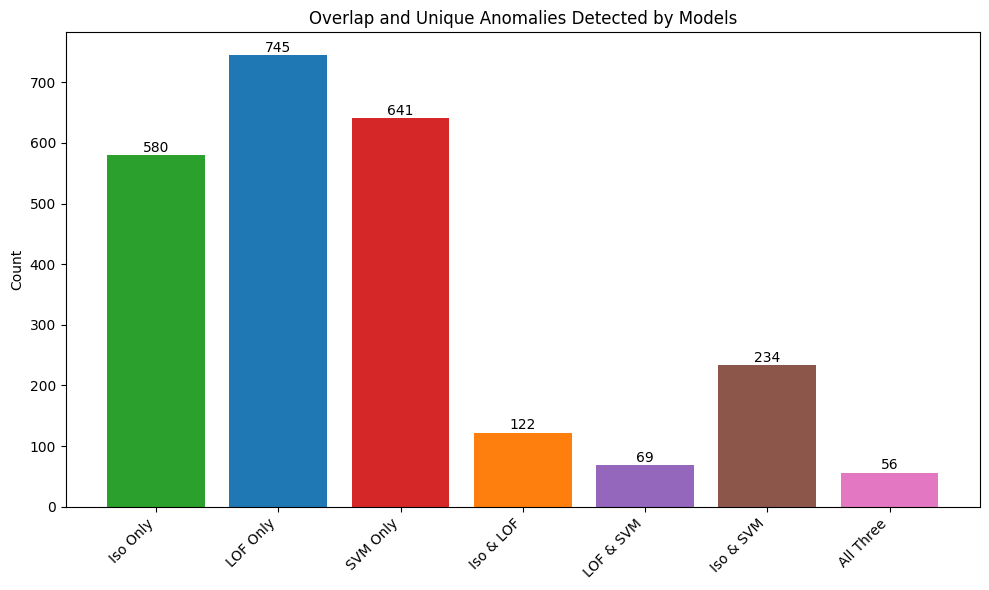

In [ ]:
# Overlap and Unique Anomalies Bar Chart
unique_iso = sum((iso_preds == 1) & (lof_preds == 0) & (svm_preds == 0))
unique_lof = sum((lof_preds == 1) & (iso_preds == 0) & (svm_preds == 0))
unique_svm = sum((svm_preds == 1) & (iso_preds == 0) & (lof_preds == 0))
overlap_iso_lof = sum((iso_preds == 1) & (lof_preds == 1) & (svm_preds == 0))
overlap_lof_svm = sum((lof_preds == 1) & (svm_preds == 1) & (iso_preds == 0))
overlap_iso_svm = sum((iso_preds == 1) & (svm_preds == 1) & (lof_preds == 0))
overlap_all = sum((iso_preds == 1) & (lof_preds == 1) & (svm_preds == 1))

overlap_data = {
    "Iso Only": unique_iso,
    "LOF Only": unique_lof,
    "SVM Only": unique_svm,
    "Iso & LOF": overlap_iso_lof,
    "LOF & SVM": overlap_lof_svm,
    "Iso & SVM": overlap_iso_svm,
    "All Three": overlap_all
}

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(overlap_data.keys(), overlap_data.values(), color=['#2ca02c', '#1f77b4', '#d62728',
                                                                  '#ff7f0e', '#9467bd', '#8c564b', '#e377c2'])
plt.title("Overlap and Unique Anomalies Detected by Models")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# Add counts above the bars for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, str(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


**INITIALISING ENSEMBLE VOTING TAKING INTO ACCOUNT ALL THE 3 MODELS.**

In [ ]:
# 4. Ensemble Voting
print("\n Ensemble Voting")
ensemble_votes = iso_preds + lof_preds + svm_preds
ensemble_preds = np.where(ensemble_votes >= 2, 1, 0)
print(f"Anomalies Detected (Ensemble Voting): {sum(ensemble_preds)}")



 Ensemble Voting
Anomalies Detected (Ensemble Voting): 481


**GENERATING CONFUSION MATRICES FOR ALL MODELS IMPLEMENTED SO FAR.**

[[TN, FP],

 [FN, TP]]

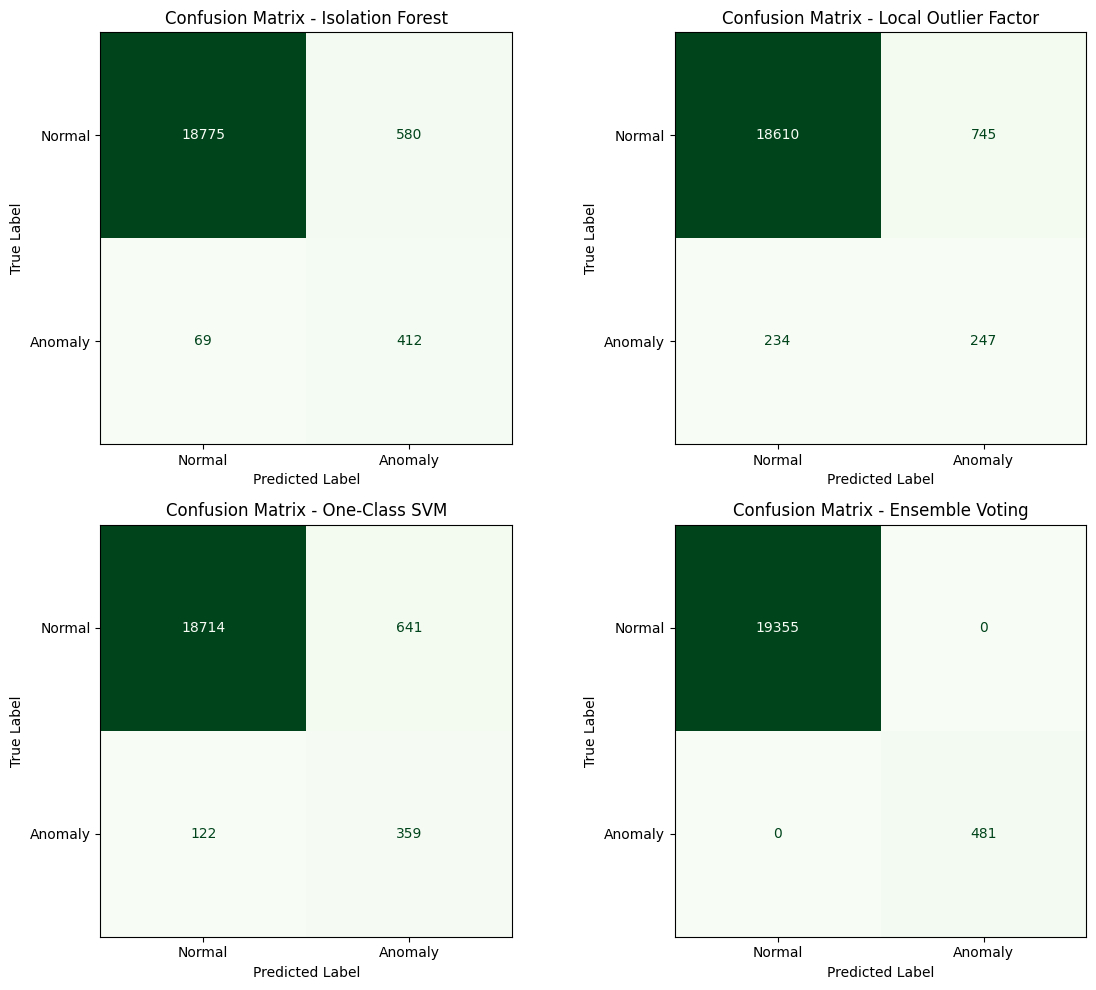

In [ ]:
# Confusion Matrices
models = {
    "Isolation Forest": iso_preds,
    "Local Outlier Factor": lof_preds,
    "One-Class SVM": svm_preds,
    "Ensemble Voting": ensemble_preds
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid of subplots
axes = axes.ravel()  # Flatten the 2D array of axes for easy iteration

for idx, (model_name, preds) in enumerate(models.items()):
    cm = confusion_matrix(ensemble_preds, preds)  # Compare against ensemble voting predictions
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomaly"])
    disp.plot(ax=axes[idx], colorbar=False, cmap="Greens")  # Use the 'Greens' colormap
    axes[idx].set_title(f"Confusion Matrix - {model_name}")
    axes[idx].set_xlabel("Predicted Label")  # Add labels for clarity
    axes[idx].set_ylabel("True Label")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**VISUALISATION : BAR PLOT TO ANALYSE NORMAL VS ANOMALY IN EACH MODEL**

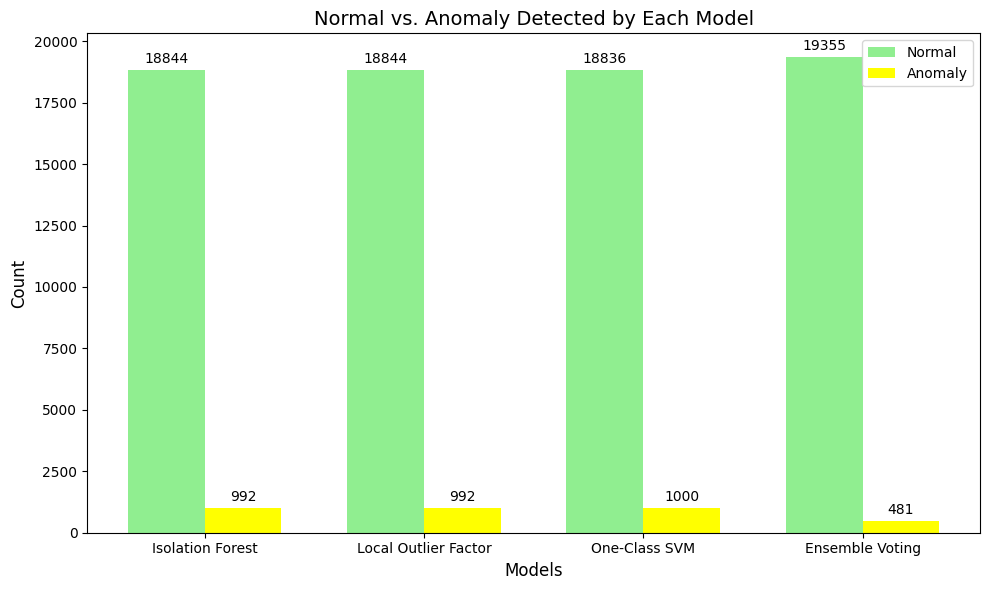

In [ ]:
# Generate data for normal vs. anomaly counts for each model
model_names = ["Isolation Forest", "Local Outlier Factor", "One-Class SVM", "Ensemble Voting"]
normal_counts = [len(iso_preds) - sum(iso_preds), len(lof_preds) - sum(lof_preds),
                 len(svm_preds) - sum(svm_preds), len(ensemble_preds) - sum(ensemble_preds)]
anomaly_counts = [sum(iso_preds), sum(lof_preds), sum(svm_preds), sum(ensemble_preds)]

# Plot the bar chart
bar_width = 0.35
x = np.arange(len(model_names))

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - bar_width / 2, normal_counts, bar_width, label='Normal', color='lightgreen')
bars2 = ax.bar(x + bar_width / 2, anomaly_counts, bar_width, label='Anomaly', color='yellow')

# Add titles and labels
ax.set_title("Normal vs. Anomaly Detected by Each Model", fontsize=14)
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=0, fontsize=10)
ax.legend()

# Annotate the bars with counts
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text above the bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


**VISUALISATION : SCATTERPLOT TO DEPICT ANOMALIES IN EACH MODEL.**

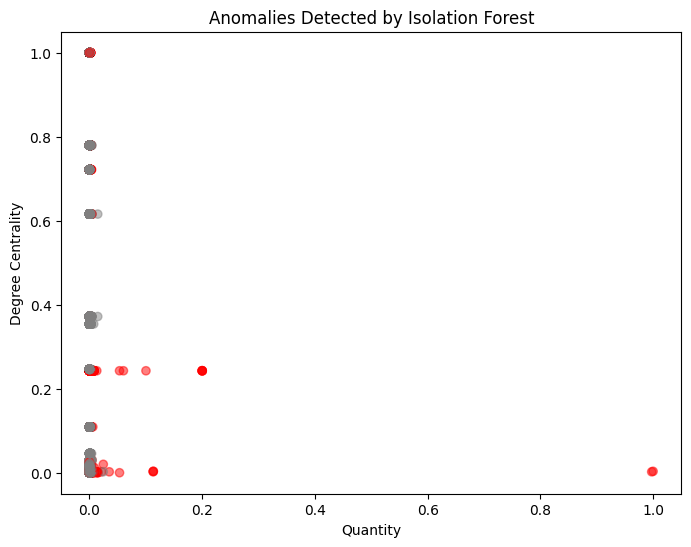

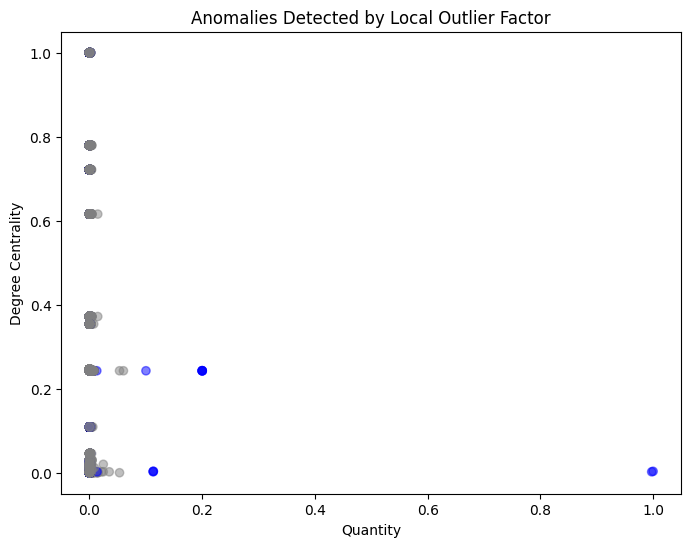

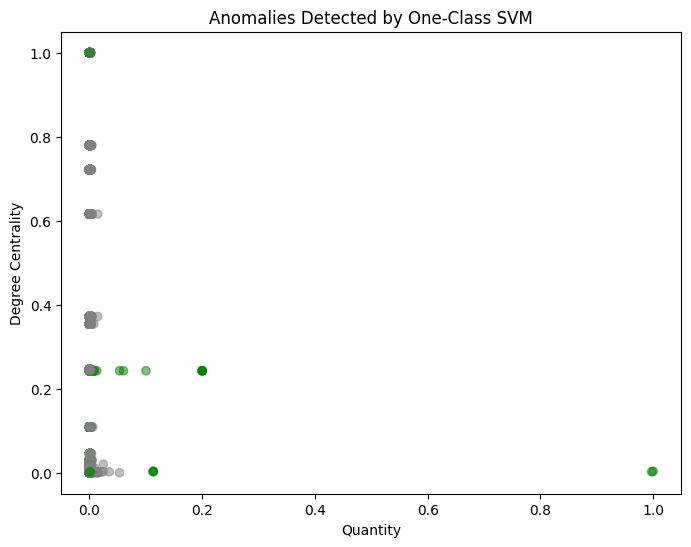

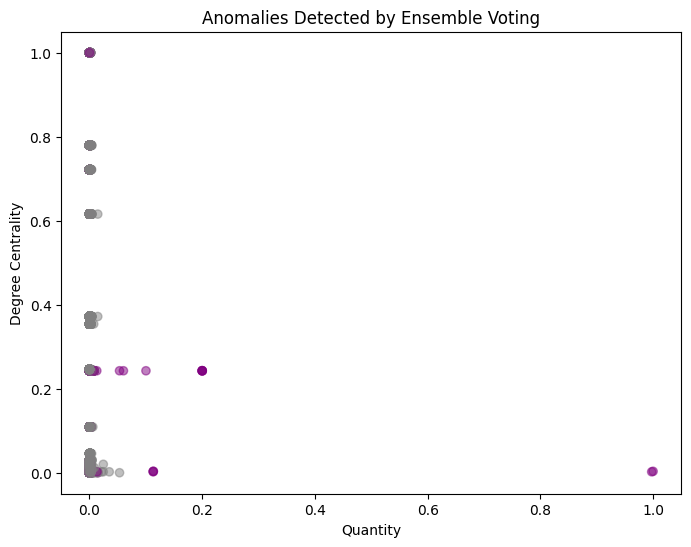

In [ ]:
# Scatter plot of anomalies
colors = {
    "Isolation Forest": 'red',
    "Local Outlier Factor": 'blue',
    "One-Class SVM": 'green',
    "Ensemble Voting": 'purple'
}
for model_name, preds in models.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=[colors[model_name] if p == 1 else 'gray' for p in preds], alpha=0.5)
    plt.title(f"Anomalies Detected by {model_name}")
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.show()

**COMPUTING METRICS FOR EACH MODEL : F1 SCORE , PRECISION AND RECALL.**

Precision=[TP/(TP+FP)]  

  Recall=[TP/(TP+FN)]
  
  ​F1 Score= [2*(Precision * Recall)/(Precision+Recall)]


In [ ]:
# Metrics for each model
metrics = {}
for model_name, preds in models.items():
    report = classification_report(ensemble_preds, preds, output_dict=True)
    metrics[model_name] = {
        "Precision": report['1']['precision'],
        "Recall": report['1']['recall'],
        "F1 Score": report['1']['f1-score']
    }

# Display Metrics
metrics_df = pd.DataFrame(metrics).T
print("\n Metrics :")
print(metrics_df)


 Metrics :
                      Precision    Recall  F1 Score
Isolation Forest       0.415323  0.856549  0.559403
Local Outlier Factor   0.248992  0.513514  0.335370
One-Class SVM          0.359000  0.746362  0.484808
Ensemble Voting        1.000000  1.000000  1.000000


**METRICS EVALUATION AND COMPARISON - BAR/LINE PLOTS.**

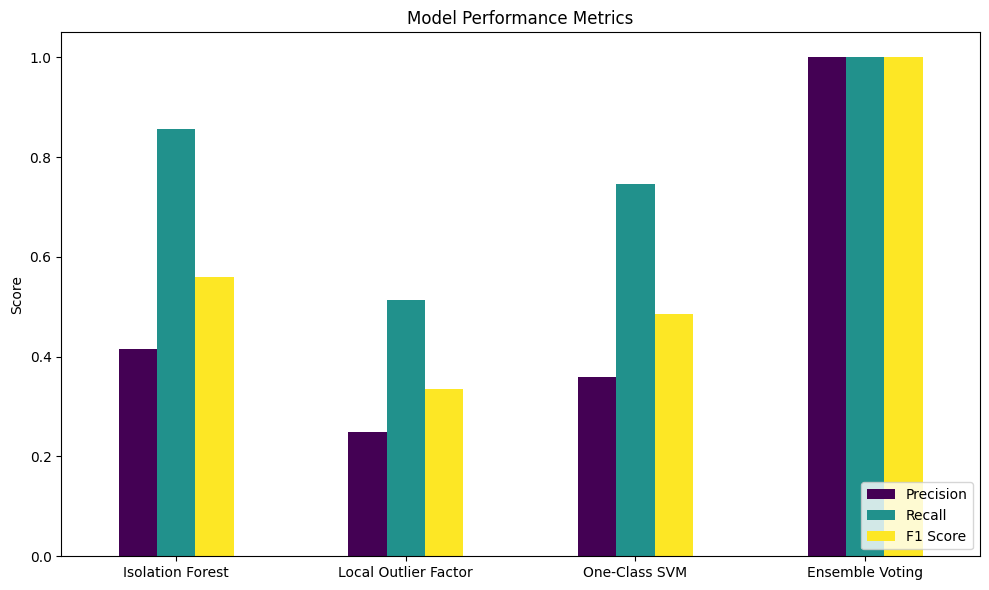

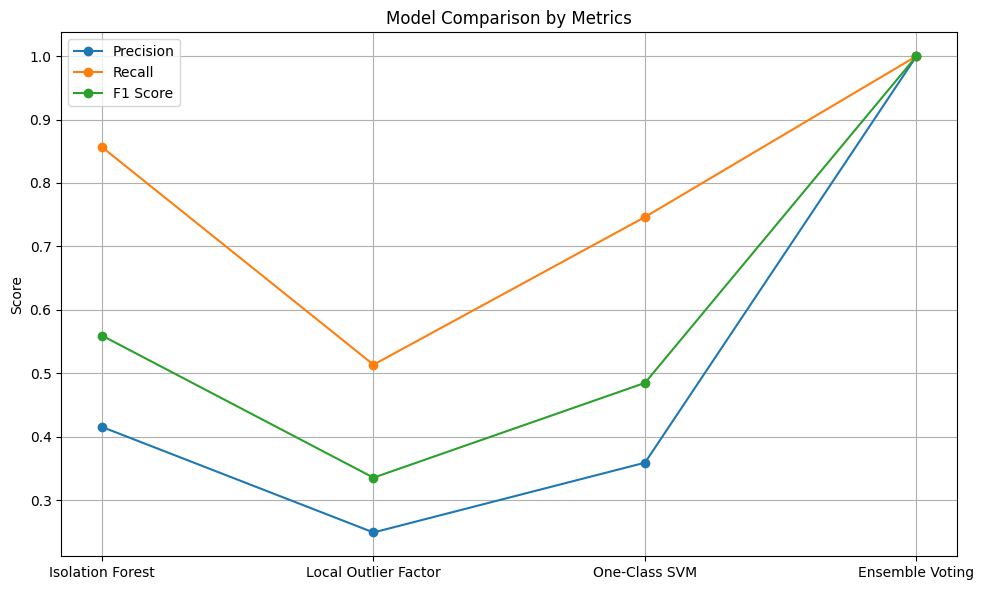

In [ ]:
# Visualizing Metrics
metrics_df.plot(kind='bar', figsize=(10, 6), colormap="viridis")
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
# Comparison Chart between Models
for metric in ["Precision", "Recall", "F1 Score"]:
    metrics_df[metric].plot(kind='line', marker='o', figsize=(10, 6), label=metric)
plt.title("Model Comparison by Metrics")
plt.ylabel("Score")
plt.xticks(range(len(metrics_df.index)), metrics_df.index, rotation=0)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
import pickle

# Save SVM model (Corrected variable name)
with open("svm_model.pkl", "wb") as svm_file:
    pickle.dump(one_class_svm, svm_file)

# Save Ensemble model  # This line is added
with open("ensemble_model.pkl", "wb") as ensemble_file:
    pickle.dump(isolation_forest, ensemble_file) # or whichever model represents your ensemble

print("Models saved successfully!")

Models saved successfully!


**Insights and Findings**:

**Model Performance:**
* **Isolation Forest:**

High recall (0.856) but lower precision (0.415).
This indicates the model is good at identifying anomalies but generates more false positives.
* **Local Outlier Factor (LOF):**

Struggles with both precision (0.249) and recall (0.513), resulting in a lower F1 score (0.335).
It is less effective in distinguishing anomalies and is prone to misclassification.
* **One-Class SVM:**

Offers a balanced trade-off with precision (0.359) and recall (0.746).
It performs moderately well but still produces a noticeable number of false positives.
* **Ensemble Voting:**

Perfect precision, recall, and F1 score (1.000), as it combines the strengths of individual models.
Effective in reducing both false positives and false negatives.



**GENERAL BUSINESS CONTEXT:**
1. Isolation Forest and One-Class SVM detect anomalies effectively for fraud prevention.  
2. Ensemble Voting ensures top accuracy for critical decisions.  
3. High-recall models aid resource-efficient investigations.  
4. Combining models optimizes anomaly detection workflows.  
5. Accurate detection builds trust and drives business growth.  

**SPRINT 3**

**ARIMA MODEL**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
file_path = 'preprocessed_normalized_dataset.csv'
data = pd.read_csv(file_path)

In [ ]:
# Step 1: Convert UnixTimestamp to datetime and set as index
data['DateTime'] = pd.to_datetime(data['UnixTimestamp'], unit='s')
data.set_index('DateTime', inplace=True)

# Step 2: Resample to daily data and aggregate Quantity
daily_data = data['Quantity'].resample('D').sum()

In [ ]:
# Step 3: Calculate Bollinger Bands
window = 20  # Moving average window size
rolling_mean = daily_data.rolling(window=window).mean()
rolling_std = daily_data.rolling(window=window).std()
upper_band = rolling_mean + (2 * rolling_std)
lower_band = rolling_mean - (2 * rolling_std)

In [ ]:
# Step 4: Train ARIMA(5,1,2) model on daily data
model = ARIMA(daily_data, order=(5, 1, 2))
model_fit = model.fit()

In [ ]:
#model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  177
Model:                 ARIMA(5, 1, 2)   Log Likelihood                  68.675
Date:                Sun, 12 Jan 2025   AIC                           -121.351
Time:                        10:02:59   BIC                            -95.987
Sample:                    01-01-2024   HQIC                          -111.063
                         - 06-25-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7791      0.471     -1.654      0.098      -1.702       0.144
ar.L2          0.0528      0.166      0.318      0.750      -0.272       0.378
ar.L3         -0.0304      0.336     -0.090      0.9

In [ ]:
# Step 5: Forecast next 30 days
forecast_start_date = '2024-05-27'

# Generate forecast for the next 30 days
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=forecast_start_date, periods=forecast_steps, freq='D')

# Get forecast values (predicted mean)
forecast_values = forecast.predicted_mean

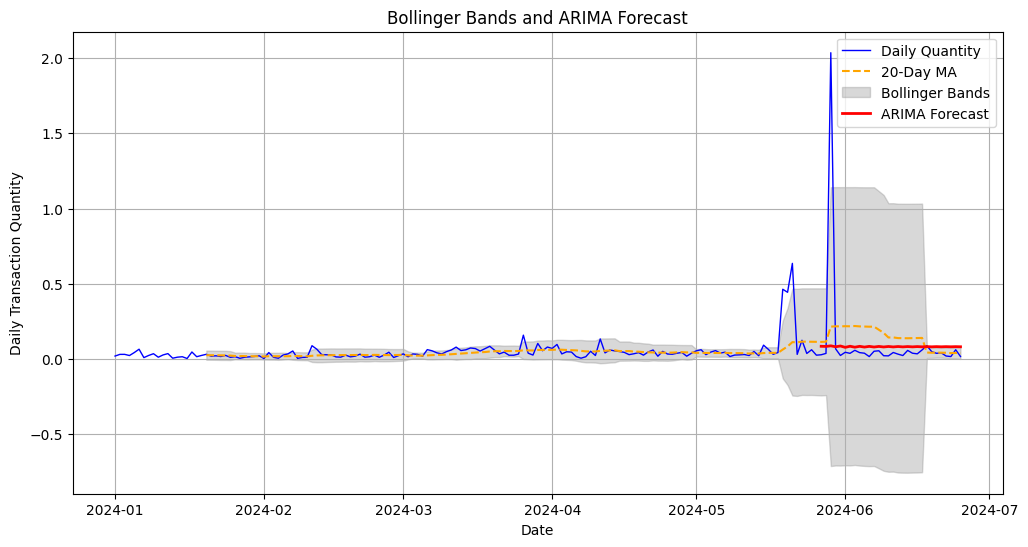

In [ ]:
# Step 6: Plot Bollinger Bands, daily data, and ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data, label='Daily Quantity', color='blue', linewidth=1)
plt.plot(rolling_mean, label='20-Day MA', color='orange', linestyle='--')
plt.fill_between(daily_data.index, upper_band, lower_band, color='gray', alpha=0.3, label='Bollinger Bands')
plt.plot(forecast_index, forecast_values, label='ARIMA Forecast', color='red', linewidth=2)

plt.title('Bollinger Bands and ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Daily Transaction Quantity')
plt.legend()
plt.grid()
plt.show()

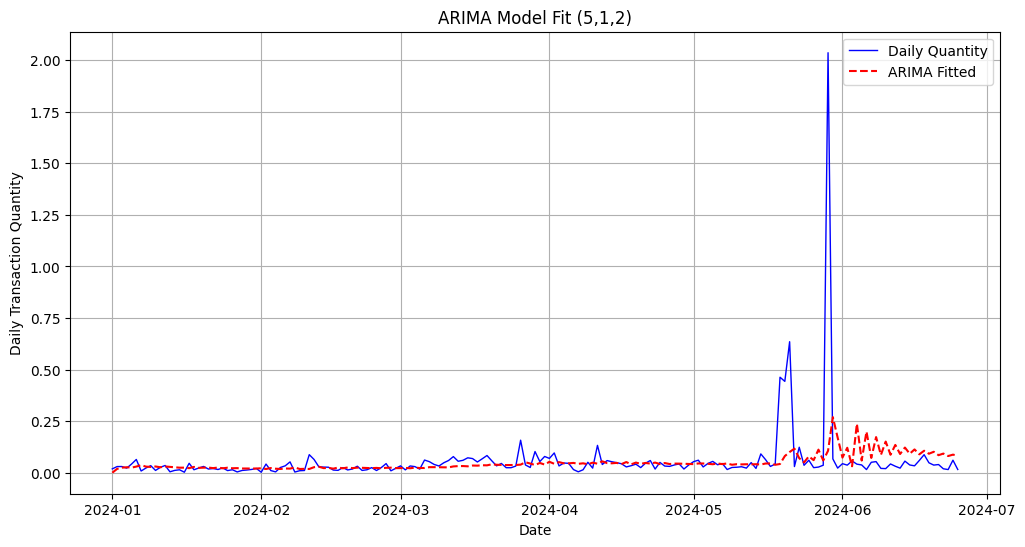

In [ ]:
# Step 7: ARIMA Fit Plot (Fitted Values)
plt.figure(figsize=(12, 6))
plt.plot(daily_data, label='Daily Quantity', color='blue', linewidth=1)
plt.plot(model_fit.fittedvalues, label='ARIMA Fitted', color='red', linestyle='--')
plt.title('ARIMA Model Fit (5,1,2)')
plt.xlabel('Date')
plt.ylabel('Daily Transaction Quantity')
plt.legend()
plt.grid()
plt.show()

**MANN-WHITNEYU TEST**

In [ ]:
from scipy.stats import mannwhitneyu

# Define the specific date for comparison
specific_date = '2024-03-29'

# Split the data into two periods: before and after the specific date
period_1 = daily_data[daily_data.index < specific_date]  # Before March 29
period_2 = daily_data[daily_data.index >= specific_date]  # On or after March 29

# To Ensure both periods have sufficient data points
if len(period_1) == 0 or len(period_2) == 0:
    print("One of the periods has no data, test cannot be performed.")
else:
    # Perform Mann-Whitney U Test
    stat, p_value = mannwhitneyu(period_1, period_2, alternative='two-sided')

    # p-value in scientific notation for clarity
    print(f"P-value: {p_value:.5e}")

    # Interpretation of results
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print(f"Significant difference detected (p-value = {p_value:.5e}). Possible manipulation suggested.")
    else:
        print(f"No significant difference detected (p-value = {p_value:.5e}).")


P-value: 9.10041e-06
Significant difference detected (p-value = 9.10041e-06). Possible manipulation suggested.


**LSTM MODEL (UPDATED)**

1.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 30, 64)              │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,657 (123.66 KB)

 Trainable params: 31,657 (123.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - loss: 0.0939 - mae: 0.2296 - val_loss: 0.0682 - val_mae: 0.1942
Epoch 2/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0708 - mae: 0.1987 - val_loss: 0.0665 - val_mae: 0.1889
Epoch 3/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - loss: 0.0680 - mae: 0.1926 - val_loss: 0.0650 - val_mae: 0.1868
Epoch 4/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - loss: 0.0652 - mae: 0.1876 - val_loss: 0.0594 - val_mae: 0.1730
Epoch 5/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - loss: 0.0603 - mae: 0.1759 - val_loss: 0.0576 - val_mae: 0.1686
Epoch 6/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - loss: 0.0585 - mae: 0.1717 - val_loss: 0.0568 - val_mae: 0.1669
Epoch 7/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - loss: 0.0577 - mae: 0.1696 - val_loss: 0.0558 - val_mae: 0.1646
Epoch 8/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - loss: 0.0568 - mae: 0.1672 - val_loss: 0.0551 - val_mae: 0.1627
Epoch 9/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 

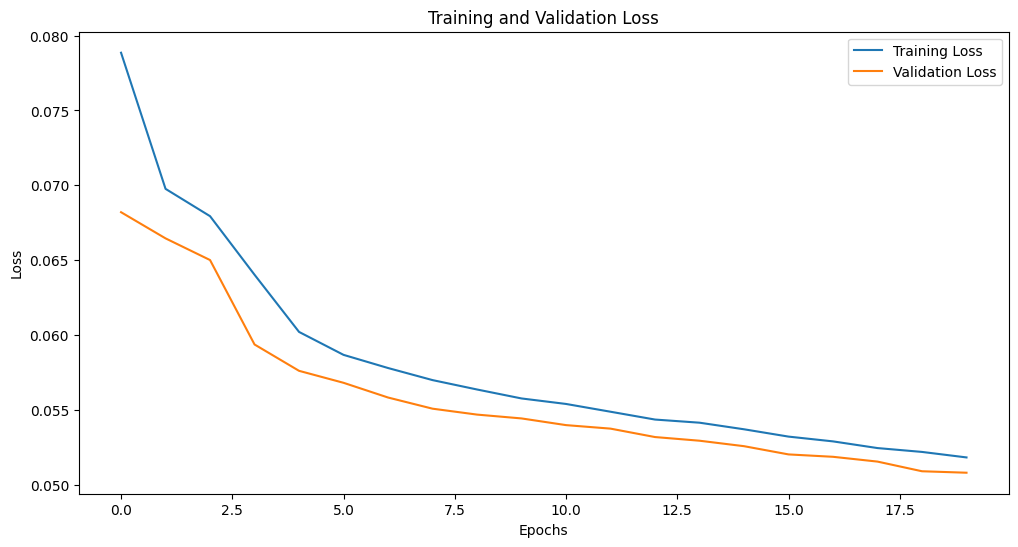

124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


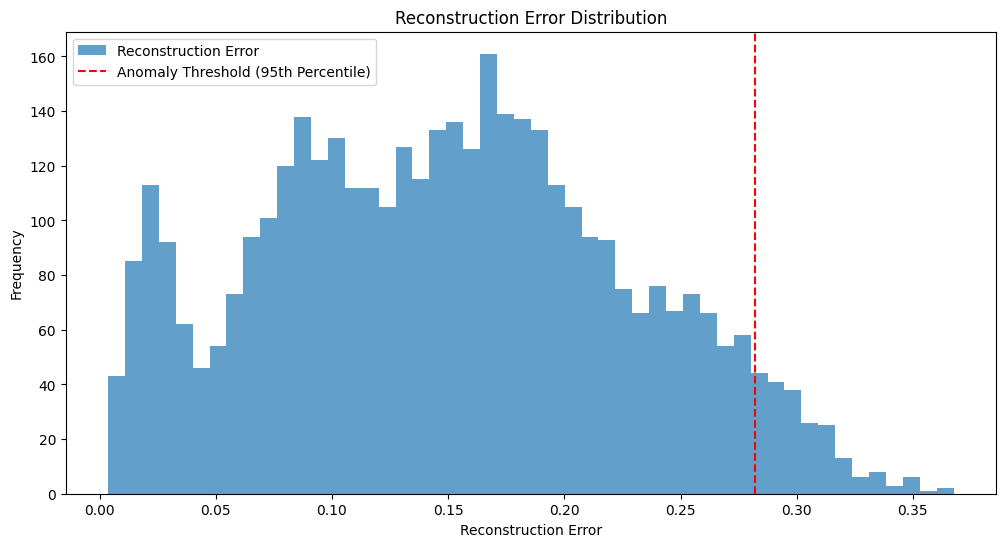

Number of anomalies detected: 199


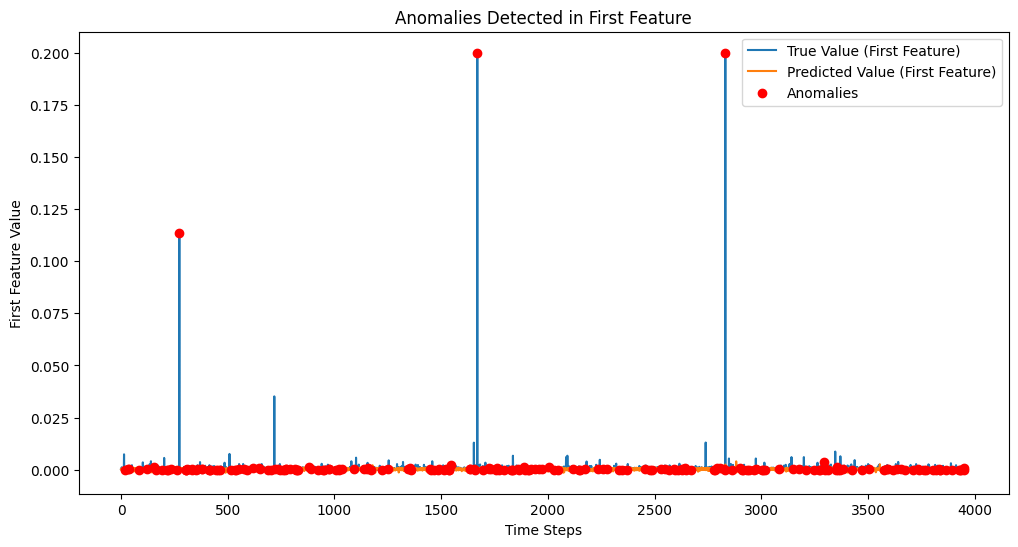

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/preprocessed_normalized_dataset.csv"  # Replace with your dataset path
data = pd.read_csv(file_path)

# Select numerical columns for LSTM input
numerical_columns = [
    "Quantity",
    "Degree Centrality",
    "Closeness Centrality",
    "Betweenness Centrality",
    "Sender_Transaction_Count",
    "Receiver_Transaction_Count",
    "Sender_Total_Quantity",
    "Receiver_Total_Quantity",
    "TimeSinceLastTransaction",
]
data_selected = data[numerical_columns]

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_selected)

# Create sliding windows
def create_sequences(data, sequence_length=30):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])  # Predict the next step
    return np.array(sequences), np.array(labels)

sequence_length = 30
X, y = create_sequences(data_normalized, sequence_length=sequence_length)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(9)  # Output layer with 9 features
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Create the model
model = create_lstm_model((sequence_length, X.shape[2]))
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict on the test data
y_pred = model.predict(X_test)

# Compute reconstruction error
reconstruction_error = np.mean(np.abs(y_test - y_pred), axis=1)

# Visualize reconstruction errors
plt.figure(figsize=(12, 6))
plt.hist(reconstruction_error, bins=50, alpha=0.7, label='Reconstruction Error')
plt.axvline(x=np.percentile(reconstruction_error, 95), color='r', linestyle='--', label='Anomaly Threshold (95th Percentile)')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Identify anomalies
threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold

# Count anomalies
print(f"Number of anomalies detected: {np.sum(anomalies)}")

# Optionally, plot the detected anomalies over time (on test data)
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 0], label='True Value (First Feature)')
plt.plot(y_pred[:, 0], label='Predicted Value (First Feature)')
plt.scatter(np.where(anomalies)[0], y_test[anomalies, 0], color='red', label='Anomalies', zorder=5)
plt.title('Anomalies Detected in First Feature')
plt.xlabel('Time Steps')
plt.ylabel('First Feature Value')
plt.legend()
plt.show()


2.

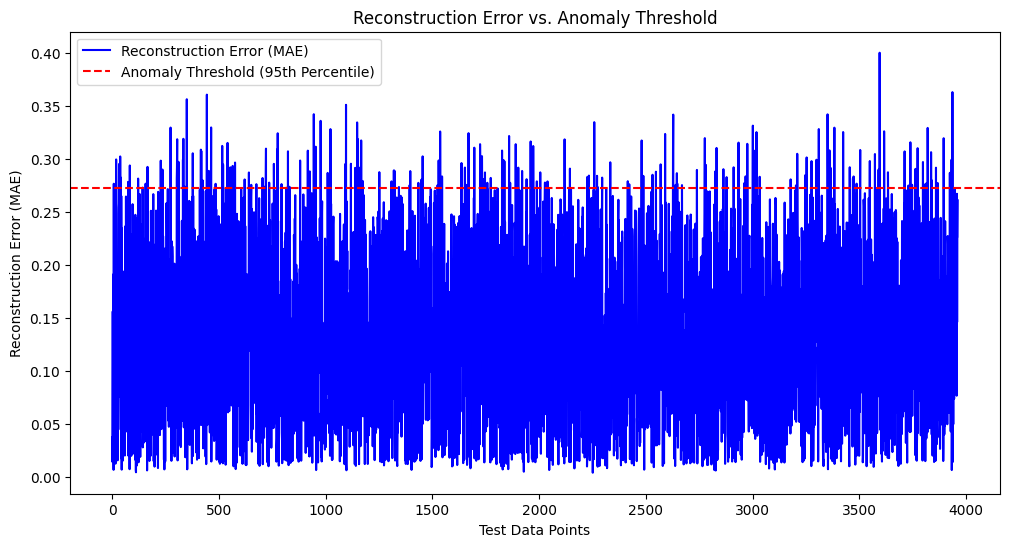

In [ ]:
# Compute reconstruction error (Mean Absolute Error)
reconstruction_error = np.mean(np.abs(y_test - y_pred), axis=1)

# Compute the threshold (95th percentile of reconstruction error)
threshold = np.percentile(reconstruction_error, 95)

# Plot the reconstruction error vs. the threshold
plt.figure(figsize=(12, 6))
plt.plot(reconstruction_error, label='Reconstruction Error (MAE)', color='blue')
plt.axhline(y=threshold, color='r', linestyle='--', label='Anomaly Threshold (95th Percentile)')
plt.title('Reconstruction Error vs. Anomaly Threshold')
plt.xlabel('Test Data Points')
plt.ylabel('Reconstruction Error (MAE)')
plt.legend()
plt.show()


**ADDITIONAL HYPERPARAMETER TUNING FOR BOTH MODELS**

**!!   USAGE OF HP.CHOICE IN FINDING BEST PARAMETERS INDICATE THAT IT RETURNS * INDEX *  OF THE ARRAY AND NOT THE VALUE PRESENT AT INDEX. TO ADD MORE CLARIFICATION, THEY ARE MAPPED AND PRINTED.**

In [ ]:
!pip install optuna
!pip install hyperopt
!pip install keras_tuner

In [ ]:
!pip install pmdarima

**OPTUNA FOR ARIMA(PMDARIMA)**

In [ ]:
import optuna
import pandas as pd
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
import numpy as np

def objective_arima(trial, y):
    # Split dataset into train and test
    train, test = y[:len(y)//2], y[len(y)//2:]

    # Hyperparameter search space for ARIMA
    p = trial.suggest_int('p', 0, 5)
    d = trial.suggest_int('d', 0, 2)
    q = trial.suggest_int('q', 0, 5)

    # Fit ARIMA model with suggested hyperparameters using pmdarima's auto_arima
    model = auto_arima(train, start_p=0, start_q=0, max_p=5, max_d=2, max_q=5,
                       seasonal=False, stepwise=True, suppress_warnings=True,
                       n_jobs=-1, trace=True,
                       p=p, d=d, q=q)

    # Forecast the test set
    forecast = model.predict(n_periods=len(test))

    # Calculate Mean Squared Error
    mse = mean_squared_error(test, forecast)
    return mse

# Load dataset (Assuming data is time series)
data = pd.read_csv("/content/preprocessed_normalized_dataset.csv")  # Replace with your file path
y = data['Quantity'].values  # Replace 'Quantity' with the actual column name

# Optimize ARIMA using Optuna
study_arima = optuna.create_study(direction='minimize')
study_arima.optimize(lambda trial: objective_arima(trial, y), n_trials=5)

# Print the best parameters found by Optuna
print("Best ARIMA parameters:", study_arima.best_params)

# Retrain the model with the best parameters
best_p = study_arima.best_params['p']
best_d = study_arima.best_params['d']
best_q = study_arima.best_params['q']

# Retrain the model using the entire dataset with the best parameters
best_model = auto_arima(y, start_p=0, start_q=0, max_p=5, max_d=2, max_q=5,
                        seasonal=False, stepwise=True, suppress_warnings=True,
                        n_jobs=-1, trace=True, p=best_p, d=best_d, q=best_q)

# Forecast with the best model
forecast = best_model.predict(n_periods=len(y)//2)

# Print results
print(f"Forecast for the test set with best ARIMA model: {forecast}")


[I 2025-01-20 09:33:11,375] A new study created in memory with name: no-name-7d092c66-81dd-444d-b00d-96d2abd4013f
/usr/local/lib/python3.11/dist-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-102510.034, Time=0.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-102767.403, Time=0.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-102696.522, Time=2.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-103115.419, Time=1.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-103155.902, Time=7.89 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-103178.657, Time=4.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,0)(0,0,0)[0]             : AIC=-103210.877, Time=5.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-103206.235, Time=7.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-103174.430, Time=5.00 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-103649.984, Time=13.00 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-103650.403, Time=12.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-103652.394, Time=15.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-103652.680, Time=3.74 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-103502.403, Time=1.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-103651.528, Time=4.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-103556.538, Time=5.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-103650.111, Time=8.65 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 99.764 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-01-20 09:34:51,396] Trial 0 finished with value: 0.00022624988825290817 and parameters: {'p': 0, 'd': 0, 'q': 3}. Best is trial 0 with value: 0.00022624988825290817.
/usr/local/lib/python3.11/dist-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-97359.736, Time=1.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-100594.708, Time=0.99 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-102579.973, Time=7.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-97361.736, Time=0.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-102278.734, Time=13.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-102682.597, Time=9.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-102757.479, Time=8.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-102820.908, Time=9.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-102541.645, Time=5.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-103236.557, Time=23.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-102148.330, Time=12.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-103087.876, Time=14.96 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-103117.618, Time=11.95 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-103033.473, Time=11.59 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-102455.244, Time=11.78 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-103234.393, Time=15.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=-103062.751, Time=4.31 sec

Best model:  ARIMA(3,1,2)(0,0,0)[0] intercept
Total fit time: 162.994 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-01-20 09:37:34,836] Trial 1 finished with value: 0.00025878963771733515 and parameters: {'p': 2, 'd': 1, 'q': 1}. Best is trial 0 with value: 0.00022624988825290817.
/usr/local/lib/python3.11/dist-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-86273.361, Time=1.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-92923.085, Time=1.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-97105.106, Time=14.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-86275.526, Time=0.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-99298.883, Time=18.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-98594.834, Time=9.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-92002.393, Time=5.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-99872.447, Time=8.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-100228.132, Time=31.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-92201.694, Time=12.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=-100276.853, Time=30.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=-92853.770, Time=12.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=-100278.974, Time=44.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,5)(0,0,0)[0] intercept   : AIC=-92830.266, Time=24.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,5)(0,0,0)[0]             : AIC=-86922.384, Time=9.19 sec

Best model:  ARIMA(0,2,5)(0,0,0)[0] intercept
Total fit time: 224.599 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-01-20 09:41:19,837] Trial 2 finished with value: 2064.9846462339206 and parameters: {'p': 5, 'd': 2, 'q': 1}. Best is trial 0 with value: 0.00022624988825290817.
/usr/local/lib/python3.11/dist-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-86273.361, Time=2.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-92923.085, Time=1.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-97105.106, Time=14.90 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-86275.526, Time=0.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-99298.883, Time=17.95 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-98594.834, Time=9.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-92002.393, Time=5.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-99872.447, Time=8.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-100228.132, Time=31.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-92201.694, Time=12.72 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=-100276.853, Time=30.97 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=-92853.770, Time=11.89 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=-100278.974, Time=44.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,5)(0,0,0)[0] intercept   : AIC=-92830.266, Time=24.82 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,5)(0,0,0)[0]             : AIC=-86922.384, Time=9.74 sec

Best model:  ARIMA(0,2,5)(0,0,0)[0] intercept
Total fit time: 226.286 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-01-20 09:45:06,524] Trial 3 finished with value: 2064.9846462339206 and parameters: {'p': 2, 'd': 2, 'q': 3}. Best is trial 0 with value: 0.00022624988825290817.
/usr/local/lib/python3.11/dist-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-86273.361, Time=2.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-92923.085, Time=1.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-97105.106, Time=14.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-86275.526, Time=0.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-99298.883, Time=17.93 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-98594.834, Time=9.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-92002.393, Time=5.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-99872.447, Time=8.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-100228.132, Time=31.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-92201.694, Time=12.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=-100276.853, Time=31.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=-92853.770, Time=11.89 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=-100278.974, Time=44.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,5)(0,0,0)[0] intercept   : AIC=-92830.266, Time=24.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,5)(0,0,0)[0]             : AIC=-86922.384, Time=8.97 sec

Best model:  ARIMA(0,2,5)(0,0,0)[0] intercept
Total fit time: 224.455 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-01-20 09:48:51,249] Trial 4 finished with value: 2064.9846462339206 and parameters: {'p': 2, 'd': 2, 'q': 3}. Best is trial 0 with value: 0.00022624988825290817.
/usr/local/lib/python3.11/dist-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Best ARIMA parameters: {'p': 0, 'd': 0, 'q': 3}
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-123762.259, Time=1.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-129681.218, Time=1.59 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-133585.150, Time=5.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-133605.153, Time=7.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-133604.969, Time=11.99 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-133590.590, Time=10.92 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-133588.942, Time=1.74 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-131697.815, Time=1.52 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-133580.590, Time=6.92 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-133624.640, Time=31.86 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-133606.122, Time=14.77 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-129693.644, Time=5.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-133624.076, Time=55.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-133615.606, Time=31.78 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-123804.402, Time=4.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-133624.132, Time=36.80 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-131723.292, Time=5.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-133607.028, Time=33.47 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 267.320 seconds
Forecast for the test set with best ARIMA model: [0.00096648 0.00051877 0.00049971 ... 0.00049887 0.00049887 0.00049887]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**HYPEROPT FOR ARIMA**

In [ ]:
import numpy as np
import pandas as pd
from hyperopt import fmin, tpe, hp, Trials
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load your dataset
data = pd.read_csv('/content/preprocessed_normalized_dataset.csv')
data['DateTime'] = pd.to_datetime(data['UnixTimestamp'], unit='s')
data.set_index('DateTime', inplace=True)

# Step 2: Resample to daily data and aggregate Quantity
daily_data = data['Quantity'].resample('D').sum()
time_series=daily_data


# Define a function for Hyperopt optimization
def objective(params):
    # Define p, d, q parameters for ARIMA model from the search space
    p = int(params['p'])
    d = int(params['d'])
    q = int(params['q'])

    # Fit the ARIMA model
    try:
        model = ARIMA(time_series, order=(p, d, q))
        model_fit = model.fit()

        # Calculate the prediction errors using MSE (Mean Squared Error)
        forecast = model_fit.forecast(steps=10)
        mse = mean_squared_error(time_series[-10:], forecast)

        return mse

    except Exception as e:
        return float('inf')

# Define the hyperparameter search space
search_space = {
    'p': hp.quniform('p', 0, 5, 1),
    'd': hp.choice('d', [0, 1, 2]),
    'q': hp.quniform('q', 0, 5, 1),
}

# Create a Trials object to keep track of search history
trials = Trials()

# Run Hyperopt optimization with the TPE algorithm
best = fmin(fn=objective, space=search_space, algo=tpe.suggest, max_evals=10, trials=trials)

print("Best Parameters from Hyperopt:", best)

# train the best ARIMA model using the optimized parameters
best_model = ARIMA(time_series, order=(int(best['p']), int(best['d']), int(best['q'])))
best_model_fit = best_model.fit()

# Print summary of the best model
print(best_model_fit.summary())


 30%|███       | 3/10 [00:01<00:04,  1.64trial/s, best loss: 0.0006622812083780396]

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



 40%|████      | 4/10 [00:02<00:03,  1.67trial/s, best loss: 0.0006622812083780396]

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



 50%|█████     | 5/10 [00:02<00:02,  1.75trial/s, best loss: 0.0006622812083780396]

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



 60%|██████    | 6/10 [00:03<00:02,  1.44trial/s, best loss: 0.0006622812083780396]

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



 70%|███████   | 7/10 [00:04<00:01,  1.51trial/s, best loss: 0.0006622812083780396]

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



 90%|█████████ | 9/10 [00:05<00:00,  1.64trial/s, best loss: 0.0006622812083780396]

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



100%|██████████| 10/10 [00:08<00:00,  1.14trial/s, best loss: 0.0006622812083780396]
Best Parameters from Hyperopt: {'d': 0, 'p': 2.0, 'q': 1.0}
                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  177
Model:                 ARIMA(2, 0, 1)   Log Likelihood                  70.717
Date:                Mon, 20 Jan 2025   AIC                           -131.433
Time:                        16:56:33   BIC                           -115.553
Sample:                    01-01-2024   HQIC                          -124.993
                         - 06-25-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0564      0.052      1.077      0.281      -0.04

**RANDOM SEARCH - ARIMA**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import BaseEstimator, RegressorMixin
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from scipy.stats import randint

# Load your dataset
data = pd.read_csv('/content/preprocessed_normalized_dataset.csv')
data['DateTime'] = pd.to_datetime(data['UnixTimestamp'], unit='s')
data.set_index('DateTime', inplace=True)

# Step 2: Resample to daily data and aggregate Quantity
daily_data = data['Quantity'].resample('D').sum()
time_series=daily_data



class ARIMAModel(BaseEstimator, RegressorMixin):
    def __init__(self, p=1, d=1, q=1):
        self.p = p
        self.d = d
        self.q = q
        self.model = None
        self.model_fit = None

    def fit(self, X, y=None):
        self.model = ARIMA(X, order=(self.p, self.d, self.q))
        self.model_fit = self.model.fit()
        return self

    def predict(self, X):
        return self.model_fit.forecast(steps=10)  # Predict next 10 values

    def get_params(self, deep=True):
        return {'p': self.p, 'd': self.d, 'q': self.q}

    def set_params(self, **params):
        self.p = params.get('p', self.p)
        self.d = params.get('d', self.d)
        self.q = params.get('q', self.q)
        return self

# Define a custom scoring function based on Mean Squared Error (MSE)
def arima_scorer(estimator, X, y=None):
    forecast = estimator.predict(X)
    mse = mean_squared_error(X[-10:], forecast)
    return -mse

# Define the parameter grid for RandomizedSearchCV (For testing different p, d, q values)
param_dist = {
    'p': randint(0, 6),  # AR order (0 to 5)
    'd': randint(0, 3),  # Differencing order (0 to 2)
    'q': randint(0, 6),  # MA order (0 to 5)
}

# Create an instance of ARIMAModel
arima_model = ARIMAModel()

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=arima_model,
    param_distributions=param_dist,
    n_iter=7,
    scoring=arima_scorer,
    random_state=42,
    n_jobs=-1
)

# model with RandomizedSearchCV
random_search.fit(time_series)

# Best parameters from RandomizedSearchCV
print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)

# best model
best_model = random_search.best_estimator_

# Print the summary of the best model
print(best_model.model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best Parameters from RandomizedSearchCV: {'d': 0, 'p': 3, 'q': 2}
                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  177
Model:                 ARIMA(3, 0, 2)   Log Likelihood                  71.344
Date:                Mon, 20 Jan 2025   AIC                           -128.687
Time:                        17:04:34   BIC                           -106.454
Sample:                    01-01-2024   HQIC                          -119.670
                         - 06-25-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0561      0.096      0.583      0.560      -0.132       0.244
ar.L1          0.0299      1.647      0.018      0.986      -3.19

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**KERAS TUNER FOR LSTM**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras_tuner import RandomSearch

# Load the dataset
file_path = "/content/preprocessed_normalized_dataset.csv"  # Replace with your dataset path
data = pd.read_csv(file_path)

# Select numerical columns for LSTM input (use the appropriate columns from your dataset)
numerical_columns = [
    "Quantity",
    "Degree Centrality",
    "Closeness Centrality",
    "Betweenness Centrality",
    "Sender_Transaction_Count",
    "Receiver_Transaction_Count",
    "Sender_Total_Quantity",
    "Receiver_Total_Quantity",
    "TimeSinceLastTransaction",
]
data_selected = data[numerical_columns]

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_selected)

# Create sliding windows for sequences
def create_sequences(data, sequence_length=30):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])  # Predict the next step
    return np.array(sequences), np.array(labels)

sequence_length = 30
X, y = create_sequences(data_normalized, sequence_length=sequence_length)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model-building function to be optimized
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32),
                   return_sequences=True,
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_lstm2', min_value=32, max_value=128, step=32)))
    model.add(Dropout(hp.Float('dropout_rate2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(9))  # Output layer with 9 features
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float('lr', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='mse', metrics=['mae'])
    return model

# Create a Keras Tuner RandomSearch instance to search hyperparameters
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Number of trials
    executions_per_trial=1,  # Each trial is run once
    directory='lstm_tuning',
    project_name='tune_lstm'
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best hyperparameters:")
print(f"Units: {best_hp['units']}")
print(f"Units LSTM 2: {best_hp['units_lstm2']}")
print(f"Dropout Rate 1: {best_hp['dropout_rate']}")
print(f"Dropout Rate 2: {best_hp['dropout_rate2']}")
print(f"Learning Rate: {best_hp['lr']}")

# Evaluate the best model
loss, mae = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")


Trial 10 Complete [00h 03m 15s]
val_loss: 0.06593682616949081

Best val_loss So Far: 0.047728996723890305
Total elapsed time: 00h 54m 38s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best hyperparameters:
Units: 128
Units LSTM 2: 64
Dropout Rate 1: 0.2
Dropout Rate 2: 0.2
Learning Rate: 0.0036910691744710153
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0482 - mae: 0.1447
Test Loss: 0.0477290116250515
Test MAE: 0.14390932023525238


**OPTUNA FOR LSTM**

In [ ]:
import optuna
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Simulated Dataset Class for LSTM
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float32)

# LSTM Model Definition
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# Prepare Data
def prepare_data(data, target_column, numerical_columns, sequence_length):
    scaler = MinMaxScaler()
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[numerical_columns].iloc[i:i + sequence_length].values
        target = data[target_column].iloc[i + sequence_length]
        sequences.append(seq)
        targets.append(target)

    return np.array(sequences), np.array(targets), scaler

# Objective Function for Optuna
def objective(trial):
    # Hyperparameters to Optimize
    hidden_dim = trial.suggest_int("hidden_dim", 16, 128)
    num_layers = trial.suggest_int("num_layers", 1, 3)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    lr = trial.suggest_loguniform("lr", 1e-5, 1e-2)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])

    # Model, Loss, and Optimizer
    model = LSTMModel(input_dim=X_train.shape[2], hidden_dim=hidden_dim, num_layers=num_layers, output_dim=1, dropout=dropout)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # Dataloader
    train_loader = DataLoader(TimeSeriesDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(TimeSeriesDataset(X_val, y_val), batch_size=batch_size, shuffle=False)

    # Training
    for epoch in range(10):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch.unsqueeze(1))
            loss.backward()
            optimizer.step()

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch)
            val_loss += criterion(y_pred, y_batch.unsqueeze(1)).item()

    return val_loss / len(val_loader)

# Load Your Data
# Replace with your dataset
import pandas as pd
data = pd.read_csv("/content/preprocessed_normalized_dataset.csv")
numerical_columns = [
    "Quantity", "Degree Centrality", "Closeness Centrality", "Betweenness Centrality",
    "Sender_Transaction_Count", "Receiver_Transaction_Count",
    "Sender_Total_Quantity", "Receiver_Total_Quantity", "TimeSinceLastTransaction"
]
target_column = "Quantity"
sequence_length = 30

X, y, scaler = prepare_data(data, target_column, numerical_columns, sequence_length)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Run Optuna Study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

# Best Hyperparameters
print("Best Trial:", study.best_trial.params)


[I 2025-01-21 07:07:53,504] A new study created in memory with name: no-name-b8973ca5-9332-4048-a148-b65679f1285b
<ipython-input-5-e1f8efdbf9fe>:54: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-5, 1e-2)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.30952859033180236 and num_layers=1
  warnings.warn(
[I 2025-01-21 07:09:51,097] Trial 0 finished with value: 6.746478206838412e-05 and parameters: {'hidden_dim': 91, 'num_layers': 1, 'dropout': 0.30952859033180236, 'lr': 0.003161397583164039, 'batch_size': 16}. Best is trial 0 with value: 6.746478206838412e-05.
<ipython-input-5-e1f8efdbf9fe>:54: FutureWarning: suggest_loguni

Best Trial: {'hidden_dim': 85, 'num_layers': 2, 'dropout': 0.3949350648994765, 'lr': 5.418030136270223e-05, 'batch_size': 16}


**HYPEROPT FOR LSTM**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from hyperopt import fmin, tpe, hp, Trials
from hyperopt.pyll.base import scope

# Custom Dataset for Time Series
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float32)

# Define the LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout
        )
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# Prepare Data
def prepare_data(data, target_column, numerical_columns, sequence_length):
    scaler = MinMaxScaler()
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[numerical_columns].iloc[i:i + sequence_length].values
        target = data[target_column].iloc[i + sequence_length]
        sequences.append(seq)
        targets.append(target)

    return np.array(sequences), np.array(targets), scaler

# Define the Hyperopt Objective Function
def hyperopt_objective(params):
    hidden_dim = params['hidden_dim']
    num_layers = params['num_layers']
    dropout = params['dropout']
    lr = params['lr']
    batch_size = params['batch_size']

    # Model, Loss, and Optimizer
    model = LSTMModel(input_dim=X_train.shape[2], hidden_dim=hidden_dim, num_layers=num_layers, output_dim=1, dropout=dropout)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # Data Loaders
    train_loader = DataLoader(TimeSeriesDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(TimeSeriesDataset(X_val, y_val), batch_size=batch_size, shuffle=False)

    # Training Loop
    for epoch in range(10):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch.unsqueeze(1))
            loss.backward()
            optimizer.step()

    # Validation Loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch)
            val_loss += criterion(y_pred, y_batch.unsqueeze(1)).item()

    return val_loss / len(val_loader)

# Define the Hyperparameter Space
space = {
    'hidden_dim': hp.choice('hidden_dim', [32, 64, 128]),
    'num_layers': scope.int(hp.quniform('num_layers', 1, 3, 1)),
    'dropout': hp.uniform('dropout', 0.1, 0.5),
    'lr': hp.loguniform('lr', np.log(1e-5), np.log(1e-2)),
    'batch_size': hp.choice('batch_size', [16, 32, 64])
}

# Load and Prepare Data
data = pd.read_csv("/content/preprocessed_normalized_dataset.csv")
numerical_columns = [
    "Quantity", "Degree Centrality", "Closeness Centrality", "Betweenness Centrality",
    "Sender_Transaction_Count", "Receiver_Transaction_Count",
    "Sender_Total_Quantity", "Receiver_Total_Quantity", "TimeSinceLastTransaction"
]
target_column = "Quantity"
sequence_length = 30

# Prepare the data for LSTM
X, y, scaler = prepare_data(data, target_column, numerical_columns, sequence_length)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Run Hyperopt Optimization
trials = Trials()
best = fmin(fn=hyperopt_objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

# Best Parameters
print("Best Parameters:", best)




 10%|█         | 1/10 [05:07<46:10, 307.79s/trial, best loss: 2.3937411341760693e-05]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.23049341222503605 and num_layers=1
  warnings.warn(



 30%|███       | 3/10 [06:52<13:09, 112.80s/trial, best loss: 2.3937411341760693e-05]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25522420876015467 and num_layers=1
  warnings.warn(



 40%|████      | 4/10 [07:17<07:48, 78.07s/trial, best loss: 2.3937411341760693e-05] 

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.23620611960151283 and num_layers=1
  warnings.warn(



 50%|█████     | 5/10 [07:42<04:53, 58.78s/trial, best loss: 2.3937411341760693e-05]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.36367047452739976 and num_layers=1
  warnings.warn(



 60%|██████    | 6/10 [08:30<03:40, 55.19s/trial, best loss: 2.3937411341760693e-05]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.32427887729397653 and num_layers=1
  warnings.warn(



 70%|███████   | 7/10 [08:55<02:15, 45.33s/trial, best loss: 2.3937411341760693e-05]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1990603695774048 and num_layers=1
  warnings.warn(



 90%|█████████ | 9/10 [11:07<00:57, 57.08s/trial, best loss: 2.3937411341760693e-05]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3322288568697781 and num_layers=1
  warnings.warn(



100%|██████████| 10/10 [11:36<00:00, 69.69s/trial, best loss: 2.3937411341760693e-05]
Best Parameters: {'batch_size': 0, 'dropout': 0.12974301772610777, 'hidden_dim': 2, 'lr': 0.0023900948296644753, 'num_layers': 2.0}


In [ ]:
#Best Parameters: {'batch_size': 0, 'dropout': 0.12974301772610777, 'hidden_dim': 2, 'lr': 0.0023900948296644753, 'num_layers': 2.0} hp choice returns index of array, below is the mapped array"
hidden_dim_options = [32, 64, 128]
batch_size_options = [16, 32, 64]

best_mapped = {
    'hidden_dim': hidden_dim_options[best['hidden_dim']],
    'num_layers': best['num_layers'],
    'dropout': best['dropout'],
    'lr': best['lr'],
    'batch_size': batch_size_options[best['batch_size']]
}

print("Mapped Best Parameters:", best_mapped)


Mapped Best Parameters: {'hidden_dim': 128, 'num_layers': 2.0, 'dropout': 0.12974301772610777, 'lr': 0.0023900948296644753, 'batch_size': 16}


**ARIMA , LSTM COMPARISON AND BUSINESS FINDINGS INSIGHT:**


1. ARIMA (5,1,2) Insights:
   - ARIMA Model Overview: ARIMA (AutoRegressive Integrated Moving Average) models time-series data by capturing the linear relationships between past observations. The parameters (5,1,2) indicate:
     - AR(5): The model uses the past 5 time periods to predict the next value.
     - I(1): The data is differenced once to make it stationary (removing trends).
     - MA(2): The model considers the past 2 error terms to adjust the prediction.
   
   - Business Insights:
     - Predicting Future Trends: ARIMA helps forecast future token transactions based on historical patterns, providing insight into likely transaction volume in the near future.
     - Identifying Seasonal Variations: If the token transactions exhibit seasonality, ARIMA can identify patterns like increased transactions during certain times or events, which can inform business strategies.
     - Demand Forecasting: With ARIMA, you can forecast periods of increased activity. For instance, if transaction volumes spike during particular periods, businesses can plan for increased demand (e.g., scaling infrastructure or marketing efforts).
     - Model Accuracy: By examining the residual errors of the ARIMA model, businesses can assess how well the model captures the underlying transaction dynamics. High accuracy means better decision-making for resource allocation and planning.
     - Strategic Decision-Making: ARIMA can give advanced notice of market or user behavior trends, allowing businesses to make proactive decisions, like adjusting token prices, marketing efforts, or liquidity management.
     - Risk Management: ARIMA helps forecast the likelihood of extreme events, allowing businesses to prepare for potential periods of low or high activity, preventing missed opportunities or over-exposure.

2. LSTM (with 9 features, 20 epochs) Insights:
   - LSTM Model Overview: Long Short-Term Memory (LSTM) networks are a type of recurrent neural network designed to capture complex, non-linear relationships over time. In this case, we use 9 features (e.g., Quantity, From, To, Blockno, UnixTimestamp, etc.) and train for 20 epochs.
   
   - Business Insights:
     - Handling Complex Patterns: LSTM can capture non-linear relationships, including dependencies between multiple features (e.g., the effect of a transaction's volume on the time of day or the sender/recipient’s behavior), which ARIMA cannot model. This helps in predicting events that involve multiple interacting factors.
     - Feature Importance: By analyzing the weights assigned to different features, businesses can identify which factors (such as specific sender/recipient patterns or transaction types) are most influential in predicting token transaction volumes. This can inform targeted strategies.
     - Predicting Anomalies: LSTM's capacity to learn complex dependencies allows it to identify anomalous behavior, such as sudden spikes in transactions that could indicate fraud, bot activity, or shifts in user behavior.
     - Improved Accuracy: LSTM generally performs better than ARIMA in capturing highly volatile and irregular data patterns. This makes it valuable for forecasting in industries with unpredictable behaviors.
     - Dynamic Market Insights: LSTM can adapt to changes over time, improving predictions as new data comes in. This makes it ideal for markets with shifting user behaviors, allowing businesses to adjust marketing, inventory, or service offerings dynamically.
     - Real-Time Analysis: With the ability to learn from sequential data, LSTM models can enable real-time analysis of token flows. For example, if a sudden change in the transaction volume or sender behavior occurs, the model can help detect and respond to such shifts quickly.
     - Risk Detection: Anomalies detected by LSTM models can help detect market manipulation, unusual spikes in transaction volumes, or system overloads before they become significant issues.
     - Long-Term Forecasting: Due to the ability to remember long sequences, LSTM can predict long-term behavior trends more effectively than ARIMA. This can be used for projecting user growth, potential market disruptions, or shifts in token economics.

3. Comparison & Business Recommendations:
   - ARIMA is better for predicting short-term, linear trends and can help businesses plan for predictable fluctuations. It’s best when the data has a clear trend or seasonal pattern.
   - LSTM, on the other hand, is more suited for capturing complex, non-linear relationships. If your business deals with highly volatile or irregular data, LSTM will likely provide more accurate predictions.
   - For risk management, LSTM could be superior due to its ability to model complex interactions and detect anomalies that might go unnoticed in an ARIMA model.
   - Model Selection: The choice of model depends on the business context. For example, if you are forecasting a stable market, ARIMA could be sufficient, but if you're in a dynamic market with rapidly changing patterns, LSTM may be better for future planning.
   - Operational Efficiency: Using both models together (ARIMA for long-term trend predictions and LSTM for short-term anomaly detection) can provide a comprehensive forecasting and risk management strategy.

 ARIMA provides simple, efficient trend-based insights, while LSTM offers advanced, adaptable capabilities for predicting complex, volatile behaviors in token transaction data. A hybrid approach that uses both models could yield the best results for your business.

**PCA , RFE , FEATURE IMPORTANCE AND RANKING**

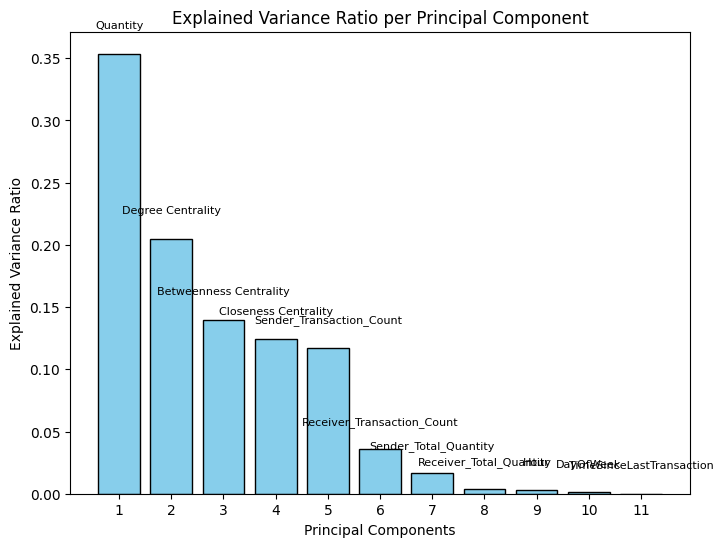


Total Explained Variance by PCA Components:
1.0


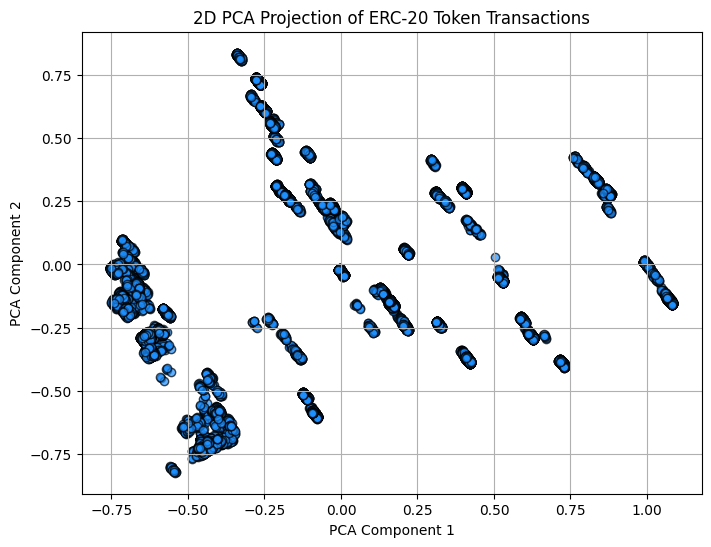

Selected Features: ['Betweenness Centrality' 'Closeness Centrality'
 'Receiver_Transaction_Count' 'Receiver_Total_Quantity' 'DayOfWeek']


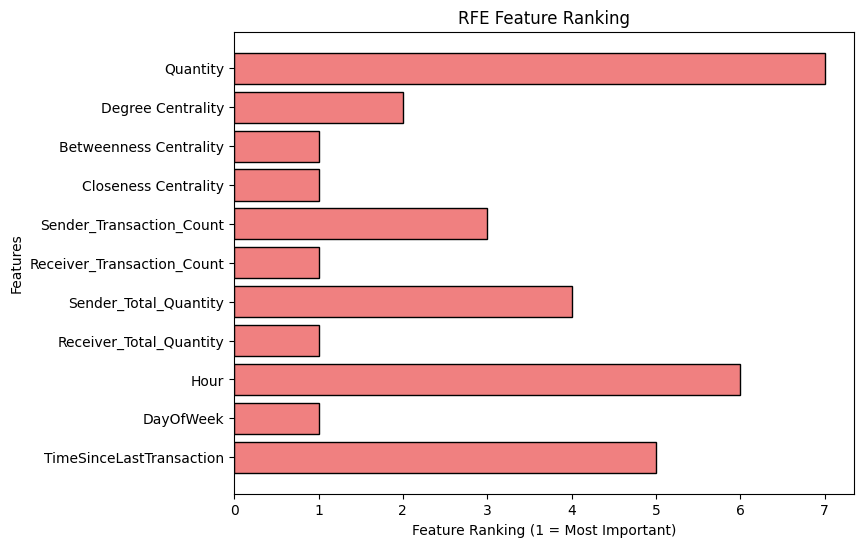

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
data_path = "preprocessed_normalized_dataset.csv"
df_preprocessed = pd.read_csv(data_path)
features = [
    'Quantity', 'Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality',
    'Sender_Transaction_Count', 'Receiver_Transaction_Count',
    'Sender_Total_Quantity', 'Receiver_Total_Quantity', 'Hour', 'DayOfWeek',
    'TimeSinceLastTransaction'
]
X = df_preprocessed[features]
#PCA (reduce to as many components as necessary)
pca = PCA(n_components=len(features))  #all components for full analysis
pca.fit(X)

#contributions to each principal component)
feature_loadings = pca.components_

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='skyblue', edgecolor='black')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))  # Label the x-axis for each principal component

# Annotate the plot with feature names based on their contribution to PC1 and PC2
for i, feature in enumerate(features):
    plt.text(i + 1, pca.explained_variance_ratio_[i] + 0.02, feature, color='black', fontsize=8, ha='center')

plt.show()
print("\nTotal Explained Variance by PCA Components:")
print(np.sum(pca.explained_variance_ratio_))  # Total explained variance across all components

# Visualize the 2D projection of the dataset based on the first two PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='dodgerblue', edgecolors='k', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA Projection of ERC-20 Token Transactions')
plt.grid(True)
plt.show()

# RFE - Recursive Feature Elimination


# Apply RFE using Logistic Regression as the estimator (ensure you have the target variable 'y')
model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
X_rfe = rfe.fit_transform(X, y)

# Display the selected features based on RFE
selected_features = np.array(features)[rfe.support_]
print("Selected Features:", selected_features)

# Visualize the ranking of features based on their importance from RFE
plt.figure(figsize=(8, 6))
plt.barh(features, rfe.ranking_, color='lightcoral', edgecolor='black')
plt.xlabel('Feature Ranking (1 = Most Important)')
plt.ylabel('Features')
plt.title('RFE Feature Ranking')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


**!!   USAGE OF HP.CHOICE IN FINDING BEST PARAMETERS INDICATE THAT IT RETURNS * INDEX *  OF THE ARRAY AND NOT THE VALUE PRESENT AT INDEX. TO ADD MORE CLARIFICATION, THEY ARE MAPPED AND PRINTED.**

**RANDOMSEARCH , GRIDSEARCH FOR ISOLATION FOREST**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer

# Load the dataset
file_path = "/content/preprocessed_normalized_dataset.csv"  # Replace with the actual dataset path
data = pd.read_csv(file_path)

# Define feature columns
features = [
    'Quantity', 'Degree Centrality', 'Betweenness Centrality',
    'Closeness Centrality', 'Sender_Transaction_Count',
    'Receiver_Transaction_Count', 'Sender_Total_Quantity',
    'Receiver_Total_Quantity', 'Hour', 'DayOfWeek',
    'TimeSinceLastTransaction'
]

# Select the features for training
X = data[features]

# Train-test split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Custom scoring function using `score_samples`
def anomaly_score(estimator, X):
    scores = estimator.score_samples(X)
    return scores.mean()  # Higher mean score indicates better model performance

# Define the custom scorer
scorer = make_scorer(anomaly_score, greater_is_better=True)

# Define the hyperparameter grid
param_distributions = {
    "n_estimators": [50, 100, 150],
    "max_samples": [0.5, 0.75, 1.0],
    "contamination": [0.05, 0.1, 0.2],
    "max_features": [0.5, 0.75, 1.0]
}

# Initialize the Isolation Forest
model = IsolationForest(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=10,
    scoring=scorer,
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train)

# Retrieve the best model and hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Print the best hyperparameters
print("Best Parameters:", best_params)

# Evaluate the model on the test data
test_scores = best_model.score_samples(X_test)
print("Mean Test Score (Anomaly Detection):", test_scores.mean())

# Get anomaly predictions for the test set
y_test_pred = best_model.predict(X_test)
anomalies = X_test[y_test_pred == -1]  # Rows flagged as anomalies
print(f"Number of anomalies detected: {len(anomalies)}")

print("Grid search")
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_samples": [0.5, 0.75, 1.0],
    "contamination": [0.05, 0.1, 0.2],
    "max_features": [0.5, 0.75, 1.0]
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train)

# Retrieve the best model and hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Parameters:", best_params)

# Evaluate the model on the test data
test_scores = best_model.score_samples(X_test)
print("Mean Test Score (Anomaly Detection):", test_scores.mean())

# Get anomaly predictions for the test set
y_test_pred = best_model.predict(X_test)
anomalies = X_test[y_test_pred == -1]  # Rows flagged as anomalies
print(f"Number of anomalies detected: {len(anomalies)}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1107: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'n_estimators': 50, 'max_samples': 0.75, 'max_features': 0.5, 'contamination': 0.1}
Mean Test Score (Anomaly Detection): -0.46291530232069245
Number of anomalies detected: 405
Grid search


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1107: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'contamination': 0.05, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 50}
Mean Test Score (Anomaly Detection): -0.4649195084391542
Number of anomalies detected: 211


**OPTUNA AND HYPEROPT FOR ISOLATION FOREST**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
import optuna
from hyperopt import fmin, tpe, hp, Trials

# Load the dataset
file_path = "/content/preprocessed_normalized_dataset.csv"  # Replace with the correct path to your dataset
data = pd.read_csv(file_path)

# Define feature columns
features = [
    'Quantity', 'Degree Centrality', 'Betweenness Centrality',
    'Closeness Centrality', 'Sender_Transaction_Count',
    'Receiver_Transaction_Count', 'Sender_Total_Quantity',
    'Receiver_Total_Quantity', 'Hour', 'DayOfWeek',
    'TimeSinceLastTransaction'
]

# Extract features for training
X = data[features]

# Train-test split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Custom scoring function using `score_samples`
def anomaly_score(estimator, X):
    scores = estimator.score_samples(X)
    return scores.mean()  # Higher mean score indicates better model performance

# Define Optuna objective function
def optuna_objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int("n_estimators", 50, 200, step=25)
    max_samples = trial.suggest_float("max_samples", 0.5, 1.0)
    contamination = trial.suggest_float("contamination", 0.05, 0.3)
    max_features = trial.suggest_float("max_features", 0.5, 1.0)

    # Initialize Isolation Forest with trial parameters
    model = IsolationForest(
        n_estimators=n_estimators,
        max_samples=max_samples,
        contamination=contamination,
        max_features=max_features,
        random_state=42
    )

    # Fit the model and calculate anomaly scores
    model.fit(X_train)
    scores = model.score_samples(X_train)

    # Return the mean anomaly score as the objective value
    return np.mean(scores)

# Create Optuna study with reduced trials
optuna_study = optuna.create_study(direction="maximize")  # Maximize the anomaly score
optuna_study.optimize(optuna_objective, n_trials=20)  # Reduced trials to 20

# Hyperopt objective function
def hyperopt_objective(params):
    n_estimators = params['n_estimators']
    max_samples = params['max_samples']
    contamination = params['contamination']
    max_features = params['max_features']

    # Initialize Isolation Forest with Hyperopt parameters
    model = IsolationForest(
        n_estimators=n_estimators,
        max_samples=max_samples,
        contamination=contamination,
        max_features=max_features,
        random_state=42
    )

    # Fit the model and calculate anomaly scores
    model.fit(X_train)
    scores = model.score_samples(X_train)

    # Return the negative of mean score as Hyperopt minimizes the objective
    return -np.mean(scores)

# Hyperopt parameter space
space = {
    'n_estimators': hp.randint('n_estimators', [50, 100, 150, 200]),
    'max_samples': hp.uniform('max_samples', 0.5, 1.0),
    'contamination': hp.uniform('contamination', 0.05, 0.3),
    'max_features': hp.uniform('max_features', 0.5, 1.0)
}

# Create Trials object to store results
trials = Trials()

# Run Hyperopt optimization with reduced trials
best_hyperopt_params = fmin(
    fn=hyperopt_objective,  # Objective function
    space=space,            # Hyperparameter space
    algo=tpe.suggest,       # Tree-structured Parzen Estimator
    max_evals=20,           # Reduced max_evals to 20
    trials=trials           # Store results in Trials
)

# Get best parameters from Optuna
optuna_best_params = optuna_study.best_params
print("Best Parameters from Optuna:", optuna_best_params)

# Get best parameters from Hyperopt
hyperopt_best_params = best_hyperopt_params
print("Best Parameters from Hyperopt:", hyperopt_best_params)

# Evaluate Optuna model
optuna_best_model = IsolationForest(
    n_estimators=optuna_best_params['n_estimators'],
    max_samples=optuna_best_params['max_samples'],
    contamination=optuna_best_params['contamination'],
    max_features=optuna_best_params['max_features'],
    random_state=42
)
optuna_best_model.fit(X_train)

# Evaluate the model on the test data
optuna_test_scores = optuna_best_model.score_samples(X_test)
print("Optuna Model Test Score (Anomaly Detection):", optuna_test_scores.mean())

# Evaluate Hyperopt model
hyperopt_best_model = IsolationForest(
    n_estimators=hyperopt_best_params['n_estimators'],
    max_samples=hyperopt_best_params['max_samples'],
    contamination=hyperopt_best_params['contamination'],
    max_features=hyperopt_best_params['max_features'],
    random_state=42
)
hyperopt_best_model.fit(X_train)

# Evaluate the model on the test data
hyperopt_test_scores = hyperopt_best_model.score_samples(X_test)
print("Hyperopt Model Test Score (Anomaly Detection):", hyperopt_test_scores.mean())

# Detect anomalies with Optuna and Hyperopt models
optuna_pred = optuna_best_model.predict(X_test)
hyperopt_pred = hyperopt_best_model.predict(X_test)

# Count anomalies detected by both models
optuna_anomalies = X_test[optuna_pred == -1]
hyperopt_anomalies = X_test[hyperopt_pred == -1]

print(f"Number of anomalies detected by Optuna model: {len(optuna_anomalies)}")
print(f"Number of anomalies detected by Hyperopt model: {len(hyperopt_anomalies)}")


[I 2025-01-20 15:13:00,674] A new study created in memory with name: no-name-d024f6e5-babb-40d4-932d-d0332b12c8c2
[I 2025-01-20 15:13:04,095] Trial 0 finished with value: -0.46241476411497845 and parameters: {'n_estimators': 125, 'max_samples': 0.6614017234063276, 'contamination': 0.21100506214863884, 'max_features': 0.6015191010914591}. Best is trial 0 with value: -0.46241476411497845.
[I 2025-01-20 15:13:06,489] Trial 1 finished with value: -0.4632334632778755 and parameters: {'n_estimators': 125, 'max_samples': 0.6014461604290896, 'contamination': 0.1149751410931918, 'max_features': 0.9150609720186513}. Best is trial 0 with value: -0.46241476411497845.
[I 2025-01-20 15:13:09,218] Trial 2 finished with value: -0.46806693039333547 and parameters: {'n_estimators': 200, 'max_samples': 0.5099711598288272, 'contamination': 0.12093689606772239, 'max_features': 0.5358801443226574}. Best is trial 0 with value: -0.46241476411497845.
[I 2025-01-20 15:13:09,873] Trial 3 finished with value: -0.

100%|██████████| 20/20 [00:06<00:00,  3.00trial/s, best loss: 0.4501994495563986]
Best Parameters from Optuna: {'n_estimators': 50, 'max_samples': 0.7674618933561412, 'contamination': 0.15900720748392477, 'max_features': 0.8470493775572482}
Best Parameters from Hyperopt: {'contamination': 0.21597215218654575, 'max_features': 0.5221456088270993, 'max_samples': 0.7060318256340248, 'n_estimators': 13}
Optuna Model Test Score (Anomaly Detection): -0.45784782772539395
Hyperopt Model Test Score (Anomaly Detection): -0.45037170457701375
Number of anomalies detected by Optuna model: 643
Number of anomalies detected by Hyperopt model: 871


**RANDOMSEARCH FOR LOF**

In [ ]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import
import numpy as np

# Step 1: Load the dataset (assuming it's a CSV file)
df = pd.read_csv('/content/preprocessed_normalized_dataset.csv')  # Update this with the path to your dataset

# Step 2: Define feature columns for LOF
features = [
    'Quantity', 'Degree Centrality', 'Betweenness Centrality',
    'Closeness Centrality', 'Sender_Transaction_Count',
    'Receiver_Transaction_Count', 'Sender_Total_Quantity',
    'Receiver_Total_Quantity', 'Hour', 'DayOfWeek',
    'TimeSinceLastTransaction'
]

# Step 3: Prepare training data using the selected features
X_train = df[features]  # Selecting the features for training data

# Step 4: Define LOF (Local Outlier Factor) model
lof = LocalOutlierFactor()
# Step 8: Apply **RandomizedSearchCV** for LOF with reduced trials
param_distributions = {
    'n_neighbors': [10, 20, 30, 50, 100],  # Number of neighbors for LOF
    'contamination': [0.01, 0.05, 0.1, 0.2],  # Proportion of outliers
    'metric': ['euclidean', 'manhattan', 'cosine']  # Distance metrics to use
}

# Reduce n_iter to 5 for fewer trials
random_search = RandomizedSearchCV(
    estimator=lof,
    param_distributions=param_distributions,
    n_iter=10,  # Reduced the number of iterations for RandomizedSearchCV
    scoring=scorer,  # Custom scoring function for LOF
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train)

# Step 9: Get the best model and parameters from **RandomizedSearchCV**
best_model_random = random_search.best_estimator_
print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1107: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters from RandomizedSearchCV: {'n_neighbors': 10, 'metric': 'euclidean', 'contamination': 0.01}


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


**OPTUNA , HYPEROPT FOR LOF**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import make_scorer
from optuna import create_study
from hyperopt import fmin, tpe, hp, Trials

# Step 1: Load the dataset
# Assuming the dataset is stored in a CSV file, replace the path with your actual dataset path
df = pd.read_csv('/content/preprocessed_normalized_dataset.csv')  # Replace with your file path

# Step 2: Define the features for LOF
features = [
    'Quantity', 'Degree Centrality', 'Betweenness Centrality',
    'Closeness Centrality', 'Sender_Transaction_Count',
    'Receiver_Transaction_Count', 'Sender_Total_Quantity',
    'Receiver_Total_Quantity', 'Hour', 'DayOfWeek',
    'TimeSinceLastTransaction'
]

# Step 3: Prepare the training data using the selected features
X_train = df[features]  # Selecting the features for training data

# Step 4: Custom scoring function for LOF (based on the negative outlier factor)
def lof_scorer(estimator, X):
    return -np.mean(estimator.fit_predict(X))

scorer = make_scorer(lof_scorer, greater_is_better=True)


# Optuna for Hyperparameter Optimization

def optuna_objective(trial):
    # Sample hyperparameters
    n_neighbors = trial.suggest_int('n_neighbors', 10, 100, step=10)
    contamination = trial.suggest_float('contamination', 0.01, 0.2, step=0.01)
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'cosine'])

    # Create and fit the model
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination, metric=metric)
    lof.fit(X_train)

    # Calculate score using the custom scorer
    score = lof_scorer(lof, X_train)
    return score

# Create Optuna study and optimize
study = create_study(direction='maximize')
study.optimize(optuna_objective, n_trials=10)

# Best parameters from Optuna
print("Best Parameters found by Optuna:", study.best_params)



# Hyperopt Implementation for Hyperparameter Optimization


# Hyperopt objective function
def hyperopt_objective(params):
    n_neighbors =int(params['n_neighbors'])
    contamination = params['contamination']
    metric = params['metric']

    # Create and fit the LOF model
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination, metric=metric)
    lof.fit(X_train)

    # Calculate score using the custom scorer
    score = lof_scorer(lof, X_train)

    # Return the score as the objective function to minimize
    return {'loss': -score, 'status': 'ok'}

# Define the hyperparameter search space
space = {
    'n_neighbors': hp.quniform('n_neighbors', 10, 100, 10),
    'contamination': hp.uniform('contamination', 0.01, 0.2),
    'metric': hp.choice('metric', ['euclidean', 'manhattan', 'cosine'])
}

# Create a Trials object to track progress
trials = Trials()

# Run Hyperopt optimization with TPE algorithm
best_hyperopt = fmin(fn=hyperopt_objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

# Best parameters from Hyperopt
print("Best Parameters found by Hyperopt:", best_hyperopt)


[I 2025-01-20 15:37:35,482] A new study created in memory with name: no-name-73bf9175-8492-43ee-85a1-41922a5ef8c2
[I 2025-01-20 15:37:40,945] Trial 0 finished with value: -0.8599516031457956 and parameters: {'n_neighbors': 100, 'contamination': 0.06999999999999999, 'metric': 'manhattan'}. Best is trial 0 with value: -0.8599516031457956.
[I 2025-01-20 15:37:46,350] Trial 1 finished with value: -0.8999798346440815 and parameters: {'n_neighbors': 90, 'contamination': 0.05, 'metric': 'manhattan'}. Best is trial 0 with value: -0.8599516031457956.
[I 2025-01-20 15:37:50,745] Trial 2 finished with value: -0.8599516031457956 and parameters: {'n_neighbors': 100, 'contamination': 0.06999999999999999, 'metric': 'manhattan'}. Best is trial 0 with value: -0.8599516031457956.
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/usr/local/lib/

Best Parameters found by Optuna: {'n_neighbors': 10, 'contamination': 0.18000000000000002, 'metric': 'euclidean'}
 40%|████      | 4/10 [00:50<00:59,  9.89s/trial, best loss: 0.6344020971970156]

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(



 50%|█████     | 5/10 [01:11<01:09, 13.93s/trial, best loss: 0.6344020971970156]

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(



100%|██████████| 10/10 [02:11<00:00, 13.14s/trial, best loss: 0.6142367412784836]
Best Parameters found by Hyperopt: {'contamination': 0.1928414218290709, 'metric': 2, 'n_neighbors': 70.0}


**OPTUNA, HYPEROPT FOR OSVM**

In [ ]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
import numpy as np
import optuna
from hyperopt import fmin, tpe, hp, Trials

# Step 1: Load the dataset (assuming it's a CSV file)
df = pd.read_csv('/content/preprocessed_normalized_dataset.csv')

# Step 2: Define feature columns for One-Class SVM
features = [
    'Quantity', 'Degree Centrality', 'Betweenness Centrality',
    'Closeness Centrality', 'Sender_Transaction_Count',
    'Receiver_Transaction_Count', 'Sender_Total_Quantity',
    'Receiver_Total_Quantity', 'Hour', 'DayOfWeek',
    'TimeSinceLastTransaction'
]

# Step 3: Prepare training data using the selected features
X_train = df[features]

# Split the dataset into training and validation sets
X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=42)

# Custom scorer for One-Class SVM (based on outlier predictions)
def ocsvm_scorer(estimator, X):
    y_pred = estimator.predict(X)
    return -np.sum(y_pred == -1)

scorer = make_scorer(ocsvm_scorer, greater_is_better=True)

#OPTUNA Implementation

# Objective function for Optuna
def optuna_objective(trial):
    # Define hyperparameters to tune
    kernel = trial.suggest_categorical('kernel', ['rbf', 'poly', 'sigmoid'])
    nu = trial.suggest_uniform('nu', 0.05, 0.3)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto', 0.1, 0.5])

    # Instantiate One-Class SVM with trial's suggested parameters
    model = OneClassSVM(kernel=kernel, nu=nu, gamma=gamma)

    # Fit the model
    model.fit(X_train)

    # Get the outlier prediction score (negative outlier factor)
    score = ocsvm_scorer(model, X_val)

    return score

# Create Optuna study and optimize hyperparameters
optuna_study = optuna.create_study(direction='maximize')
optuna_study.optimize(optuna_objective, n_trials=10)

# Get the best parameters
print(f"Best Parameters from Optuna: {optuna_study.best_params}")

#HYPEROPT Implementation

# Objective function for Hyperopt
def hyperopt_objective(params):
    kernel = params['kernel']
    nu = params['nu']
    gamma = params['gamma']

    # Instantiate One-Class SVM with suggested parameters
    model = OneClassSVM(kernel=kernel, nu=nu, gamma=gamma)

    # Fit the model
    model.fit(X_train)

    # Get the outlier prediction score (negative outlier factor)
    score = ocsvm_scorer(model, X_val)

    return {'loss': -score, 'status': 'ok'}

# Define the hyperparameter space for Hyperopt
space = {
    'kernel': hp.choice('kernel', ['rbf', 'poly', 'sigmoid']),
    'nu': hp.uniform('nu', 0.05, 0.3),
    'gamma': hp.choice('gamma', ['scale', 'auto', 0.1, 0.5])
}

# Run Hyperopt optimization with TPE algorithm
trials = Trials()
best_hyperopt = fmin(fn=hyperopt_objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

# Get the best parameters
print(f"Best Parameters from Hyperopt: {best_hyperopt}")


[I 2025-01-20 15:53:25,587] A new study created in memory with name: no-name-80e05704-0abd-4d35-92fd-b588ade6c2f7
<ipython-input-34-2af6cdb58fea>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  nu = trial.suggest_uniform('nu', 0.05, 0.3)
[I 2025-01-20 15:53:39,176] Trial 0 finished with value: -1092.0 and parameters: {'kernel': 'rbf', 'nu': 0.2805224741262088, 'gamma': 0.5}. Best is trial 0 with value: -1092.0.
<ipython-input-34-2af6cdb58fea>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  nu = trial.suggest_uniform('nu', 0.05, 0.3)
[I 2025-01-20 15:53:47,678] Trial 1 finished with value: -1048.0 and parameters: {'kernel': 'poly', 'nu': 0.27722234042105387, 'gamma': 'scale'}. Best is trial 1 with valu

Best Parameters from Optuna: {'kernel': 'rbf', 'nu': 0.0718692007562984, 'gamma': 0.1}
100%|██████████| 10/10 [01:02<00:00,  6.25s/trial, best loss: 317.0]
Best Parameters from Hyperopt: {'gamma': 0, 'kernel': 0, 'nu': 0.07529991136595555}


In [ ]:
# Map indices to actual values
kernel_map = ['rbf', 'poly', 'sigmoid']
gamma_map = ['scale', 'auto', 0.1, 0.5]

best_params = {'gamma': 0, 'kernel': 0, 'nu': 0.07529991136595555}

# Map the indices to actual values
mapped_params = {
    'kernel': kernel_map[best_params['kernel']],
    'nu': best_params['nu'],
    'gamma': gamma_map[best_params['gamma']]
}

# Print the mapped parameters
print("Mapped Parameters:", mapped_params)


Mapped Parameters: {'kernel': 'rbf', 'nu': 0.07529991136595555, 'gamma': 'scale'}
